<center><h1> - Tabular Playground Series - Sep 2022 - </h1></center>
<b>Goal</b>: Predicting book sales during the year 2021 for 4 items from two competing stores located in six different countries.

### ⬇ Libraries

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Folders

In [2]:
PROJECT_DIR = os.path.join(".", "..")
DATASET_DIR = os.path.join(PROJECT_DIR, "dataset")

## 1. Basic exploration
* <b>Train dataset Columns</b>:
    * row_id: Incrementing row of dataset.
    * date (timestamp): The day on which the book stores are opened beginning from 2017-01-01 up to 2020-12-31. 
    Note that the stores neither close on weekends nor during holidays.
    * country (str): The 6 different countries - Belgium, France, Germany, Italy, Poland & Spain
    * store (str): The 2 competing store names - KaggleMart & KaggleRama
    * product (str): The 4 different book names
    * num_sold (int): Target value - Number of sales for given date.

### ❗ First insights
* The dataset is perfectly structured and covers 4 years worth of training and 1 year worth of testing data
* No missing data
* Each day contains the `num_sold` for 2 shops across 6 countries & 4 different items

In [3]:
train_df = pd.read_csv(os.path.join(DATASET_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(DATASET_DIR, "test.csv"))

In [4]:
train_df.head(10)

row_id        date  country       store                           product  \
0       0  2017-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1       1  2017-01-01  Belgium  KaggleMart            Kaggle Getting Started   
2       2  2017-01-01  Belgium  KaggleMart                Kaggle Recipe Book   
3       3  2017-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
4       4  2017-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques   
5       5  2017-01-01  Belgium  KaggleRama            Kaggle Getting Started   
6       6  2017-01-01  Belgium  KaggleRama                Kaggle Recipe Book   
7       7  2017-01-01  Belgium  KaggleRama  Kaggle for Kids: One Smart Goose   
8       8  2017-01-01   France  KaggleMart        Kaggle Advanced Techniques   
9       9  2017-01-01   France  KaggleMart            Kaggle Getting Started   

   num_sold  
0       663  
1       615  
2       480  
3       710  
4       240  
5       187  
6       158  
7       267  
8       610  
9       463

In [9]:
test_df.head()

row_id        date  country       store                           product
0   70128  2021-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques
1   70129  2021-01-01  Belgium  KaggleMart            Kaggle Getting Started
2   70130  2021-01-01  Belgium  KaggleMart                Kaggle Recipe Book
3   70131  2021-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose
4   70132  2021-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques

In [10]:
train_df.shape

(70128, 6)

In [11]:
test_df.shape

(17520, 5)

##### Unique values per column

In [12]:
print("Train data: ")
print(f"Date column unique entries: {len(train_df.date.unique())} from {train_df.date.unique()[0]} to {train_df.date.unique()[-1]}")
print(f"Country column unique entries: {len(train_df.country.unique())}  - {train_df.country.unique()} ")
print(f"Store column unique entries: {len(train_df.store.unique())} - {train_df.store.unique()} ")
print(f"Product column unique entries: {len(train_df['product'].unique())} - {train_df['product'].unique()}")
print()
print("Test data: ")
print(f"Date column unique entries: {len(test_df.date.unique())} from {test_df.date.unique()[0]} to {test_df.date.unique()[-1]}")
print(f"Country column unique entries: {len(test_df.country.unique())}  - {test_df.country.unique()} ")
print(f"Store column unique entries: {len(test_df.store.unique())} - {test_df.store.unique()} ")
print(f"Product column unique entries: {len(test_df['product'].unique())} - {test_df['product'].unique()}")

Train data: 
Date column unique entries: 1461 from 2017-01-01 to 2020-12-31
Country column unique entries: 6  - ['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain'] 
Store column unique entries: 2 - ['KaggleMart' 'KaggleRama'] 
Product column unique entries: 4 - ['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']

Test data: 
Date column unique entries: 365 from 2021-01-01 to 2021-12-31
Country column unique entries: 6  - ['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain'] 
Store column unique entries: 2 - ['KaggleMart' 'KaggleRama'] 
Product column unique entries: 4 - ['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']


##### Time intervall between datapoints

In [13]:
print(f"First date: {train_df.date.unique()[0]}, second date: {train_df.date.unique()[1]}")
print(f"First date: {train_df.date.unique()[0]}, 7th date: {train_df.date.unique()[7]}")
print(f"N-1'th date: {train_df.date.unique()[-2]}, N'th date: {train_df.date.unique()[-1]}")

First date: 2017-01-01, second date: 2017-01-02
First date: 2017-01-01, 7th date: 2017-01-08
N-1'th date: 2020-12-30, N'th date: 2020-12-31


##### Occurance of features

<AxesSubplot:title={'center':'Occurance in test df'}, xlabel='Product'>

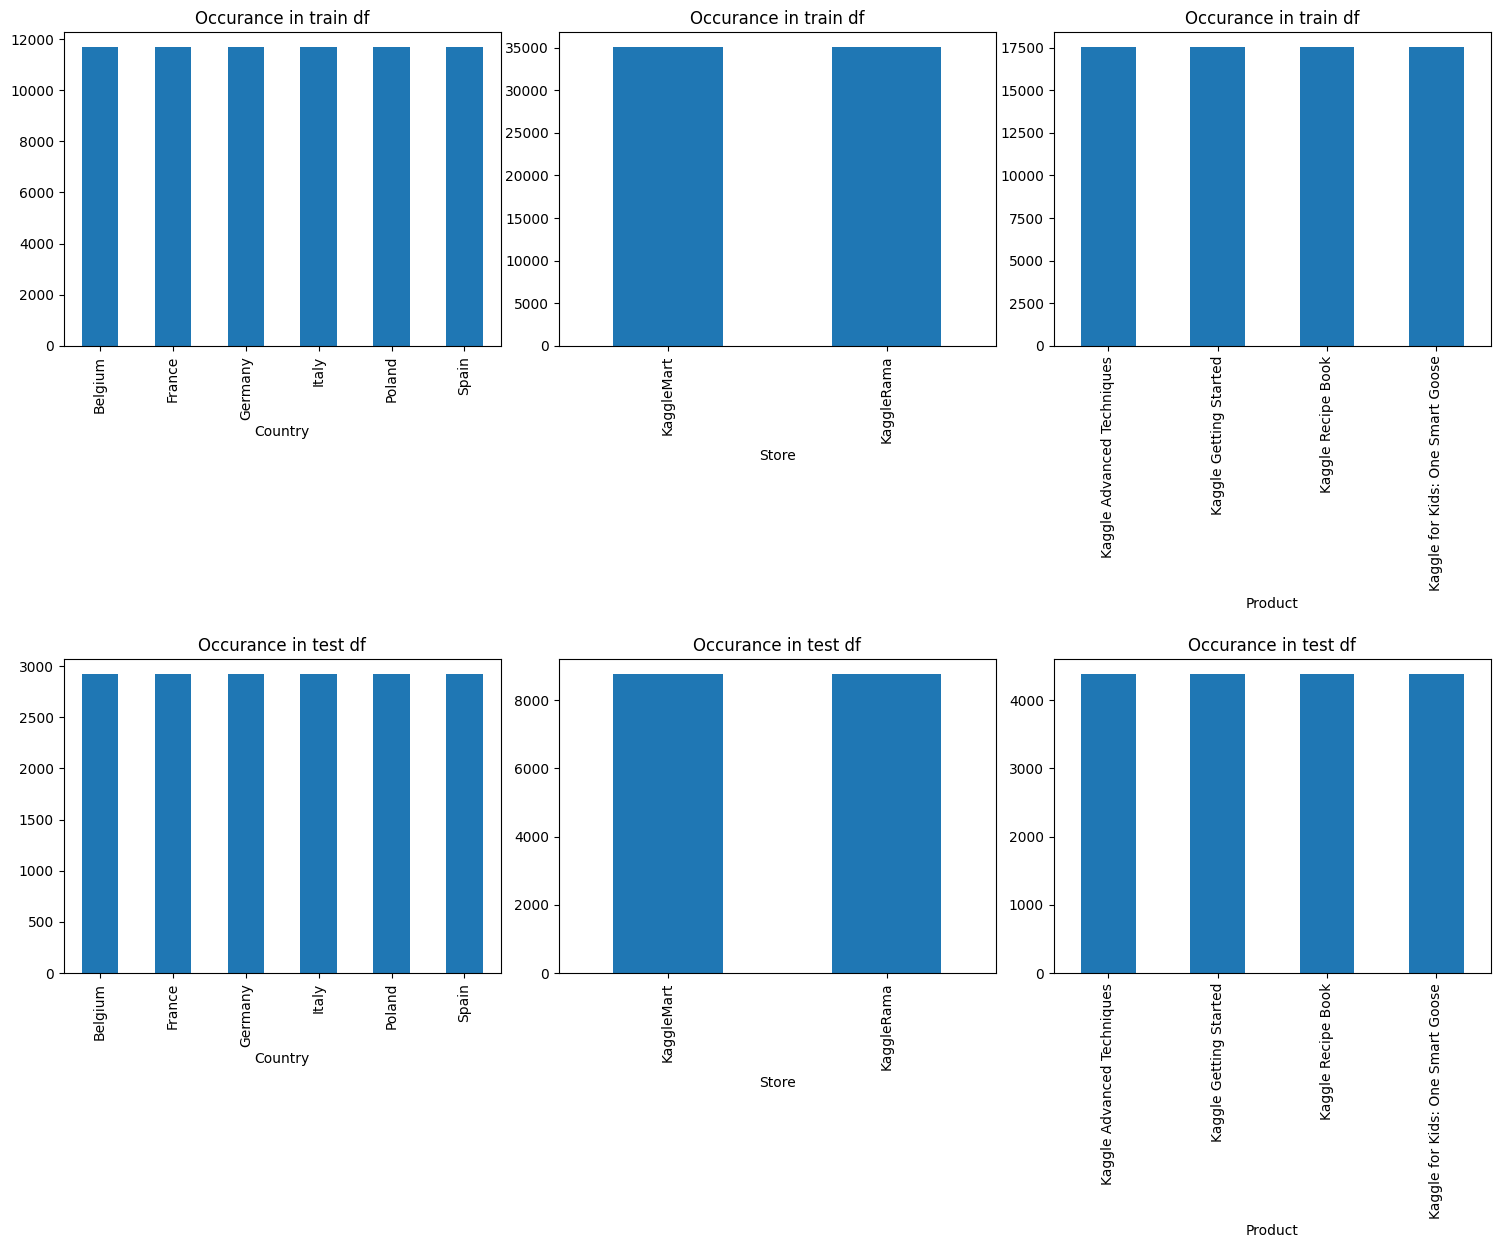

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.tight_layout()
plt.subplots_adjust(hspace=1)
# -> Train dataset
# Plot country occurances
axes[0][0].set_title('Occurance in train df')
axes[0][0].set_xlabel('Country')
train_df.country.value_counts().plot(ax=axes[0][0], kind = 'bar')
# Plot store occurances
axes[0][1].set_title('Occurance in train df')
axes[0][1].set_xlabel('Store')
train_df.store.value_counts().plot(ax=axes[0][1], kind = 'bar')
# Plot product occurances
axes[0][2].set_title('Occurance in train df')
axes[0][2].set_xlabel('Product')
train_df['product'].value_counts().plot(ax=axes[0][2], kind = 'bar')
# -> Test dataset
# Plot country occurances
axes[1][0].set_title('Occurance in test df')
axes[1][0].set_xlabel('Country')
test_df.country.value_counts().plot(ax=axes[1][0], kind = 'bar')
# Plot store occurances
axes[1][1].set_title('Occurance in test df')
axes[1][1].set_xlabel('Store')
test_df.store.value_counts().plot(ax=axes[1][1], kind = 'bar')
# Plot product occurances
axes[1][2].set_title('Occurance in test df')
axes[1][2].set_xlabel('Product')
test_df['product'].value_counts().plot(ax=axes[1][2], kind = 'bar')

In [15]:
assert train_df.shape[0] / len(train_df.date.unique()) == 2 * 4 * 6

## 2. Further analysis of
- Sales per country
- Sales per country & individual product
- Sales per store
- Sales per store & individual product
- Sales per store & country
- Sales per store, country & individual product

In [16]:
# Convert column types
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

### a) Sales per country

<b>❗ Insights</b> :
- Change in data from year 2020 onward: Across all 6 countries the sales are almost identical in terms of absolute value and seasonality.

- Spikes at the end of each year -> Seasonality due to christmas & new year.
- Weekly seasonality -> Expressed by lag = n * 7 in autocorrelation

<b> ❓ Questions </b>:
- Only train on data starting from 2020 onward as the past behaviour is no longer representative.

In [18]:
sales_per_country = train_df.groupby(['date','country']).agg({
    'num_sold': 'sum',
}).reset_index()
sales_per_country = sales_per_country.set_index('date')
sales_per_country.head(10)


country  num_sold
date                         
2017-01-01  Belgium      3320
2017-01-01   France      2939
2017-01-01  Germany      3437
2017-01-01    Italy      2431
2017-01-01   Poland      1074
2017-01-01    Spain      2151
2017-01-02  Belgium      2525
2017-01-02   France      2182
2017-01-02  Germany      2574
2017-01-02    Italy      1848

<AxesSubplot:title={'center':'Sales in Spain'}, xlabel='date'>

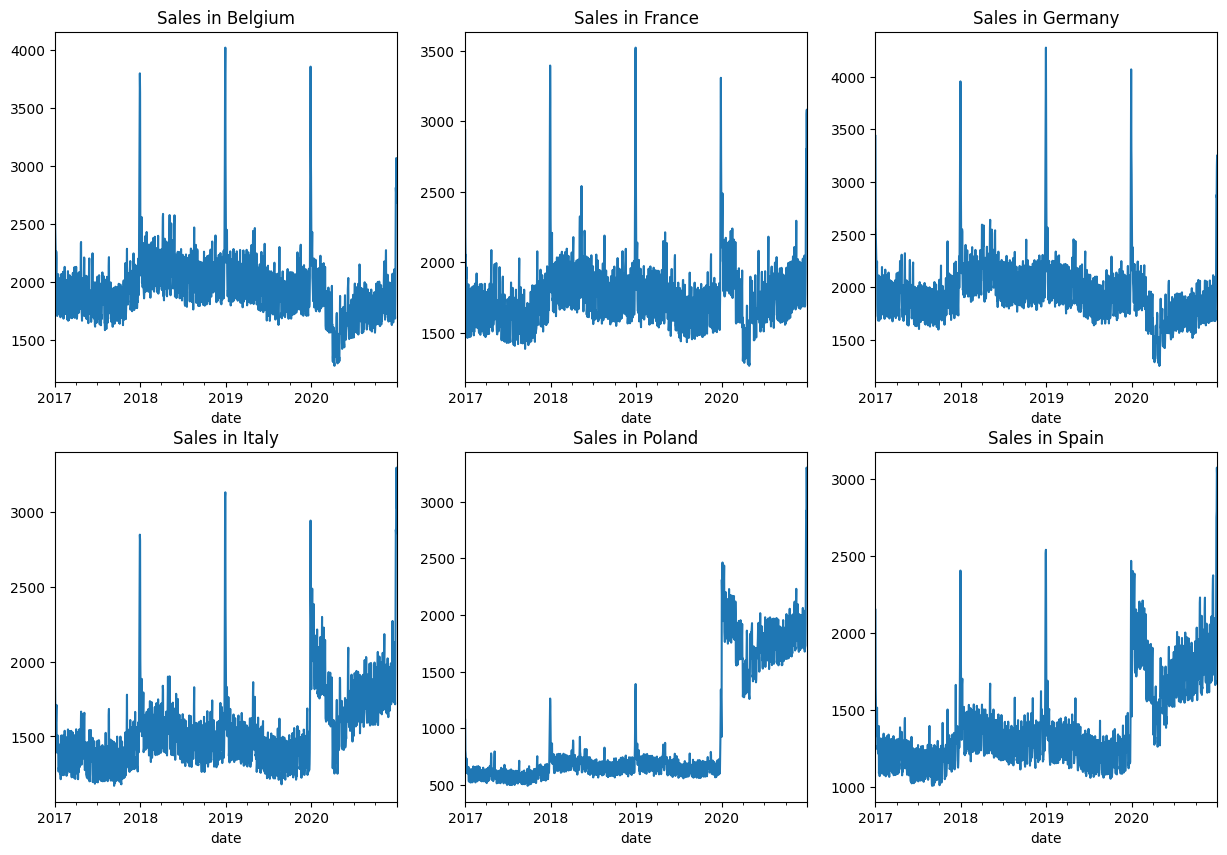

In [19]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes[0][0].set_title('Sales in Belgium')
axes[0][0].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Belgium']['num_sold'].plot(ax=axes[0][0])
axes[0][1].set_title('Sales in France')
axes[0][1].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'France']['num_sold'].plot(ax=axes[0][1])
axes[0][2].set_title('Sales in Germany')
axes[0][2].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Germany']['num_sold'].plot(ax=axes[0][2])
axes[1][0].set_title('Sales in Italy')
axes[1][0].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Italy']['num_sold'].plot(ax=axes[1][0])
axes[1][1].set_title('Sales in Poland')
axes[1][1].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Poland']['num_sold'].plot(ax=axes[1][1])
axes[1][2].set_title('Sales in Spain')
axes[1][2].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Spain']['num_sold'].plot(ax=axes[1][2])

In [20]:
def plot_sales_per_country(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['country'] == 'Belgium']['num_sold'].plot(label='Belgium')
    df[df['country'] == 'France']['num_sold'].plot(label='France')
    df[df['country'] == 'Germany']['num_sold'].plot(label='Germany')
    df[df['country'] == 'Italy']['num_sold'].plot(label='Italy')
    df[df['country'] == 'Poland']['num_sold'].plot(label='Poland')
    df[df['country'] == 'Spain']['num_sold'].plot(label='Spain')
    plt.legend()
    plt.title("Sales per country")
    plt.xlabel("date")
    plt.show()

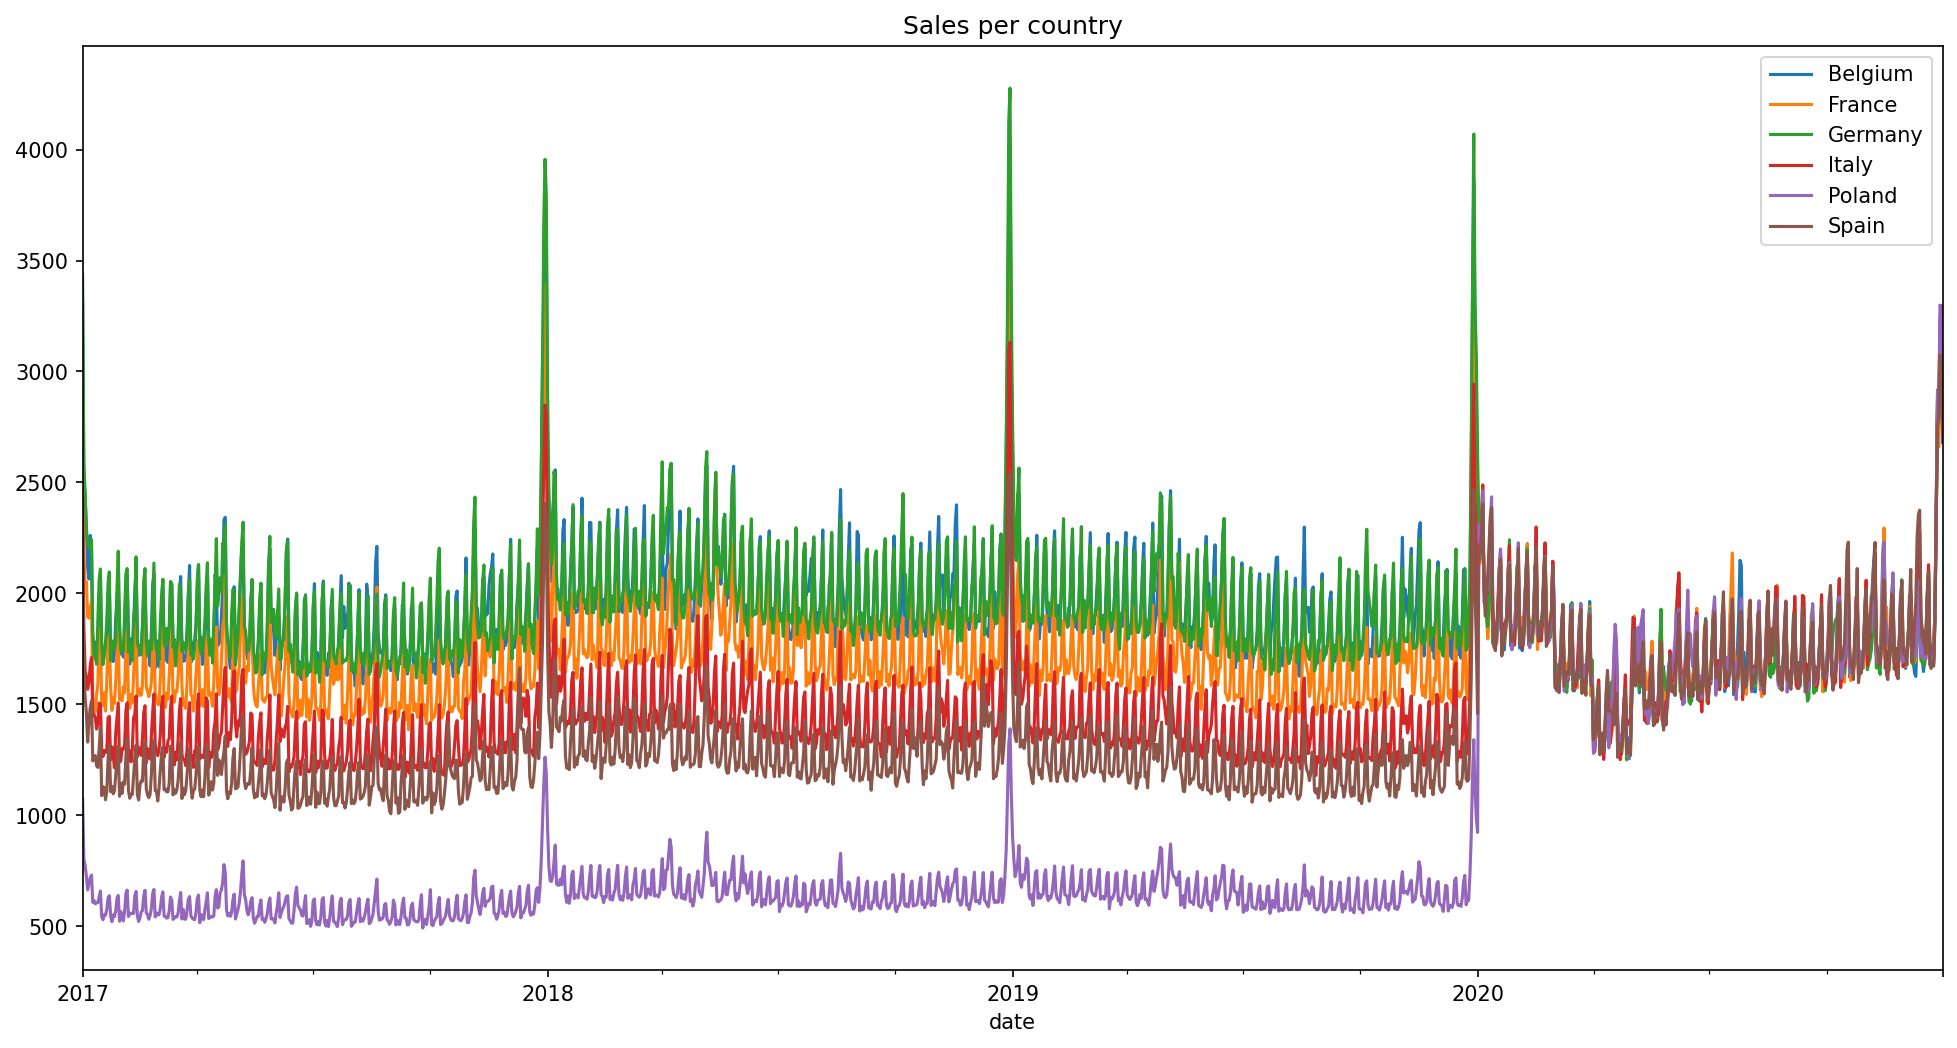

In [21]:
plot_sales_per_country(sales_per_country)

In [25]:
# Inspect one year
sales_per_country = sales_per_country.reset_index()
sales_per_country_2017 = sales_per_country[sales_per_country['date'] < pd.Timestamp("2018-01-01")]
sales_per_country_2020 = sales_per_country[sales_per_country['date'] > pd.Timestamp("2019-12-01")]
sales_per_country_2017_january = sales_per_country[sales_per_country['date'] < pd.Timestamp("2017-02-01")]
sales_per_country_2017_january.set_index('date', inplace=True)
sales_per_country_2017.set_index('date', inplace=True)
sales_per_country_2020.set_index('date', inplace=True)

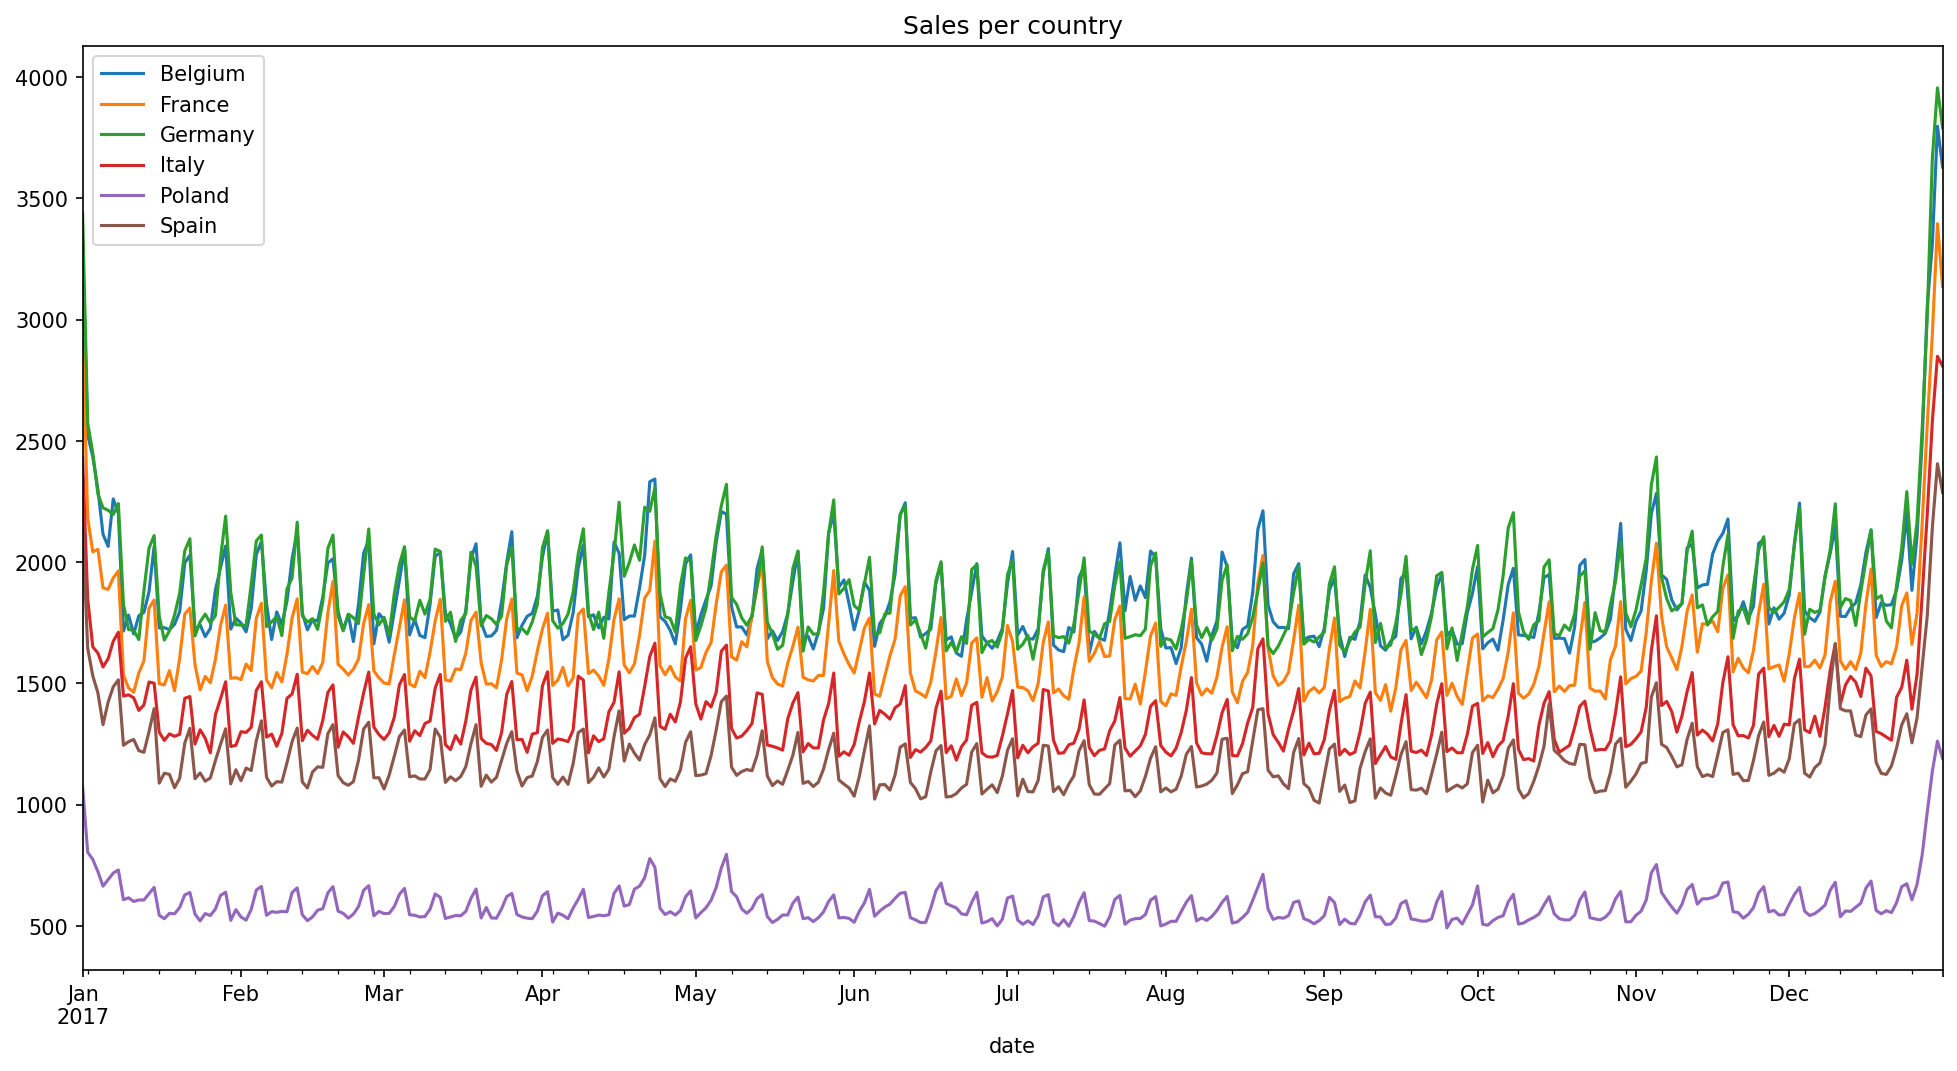

In [26]:
plot_sales_per_country(sales_per_country_2017)

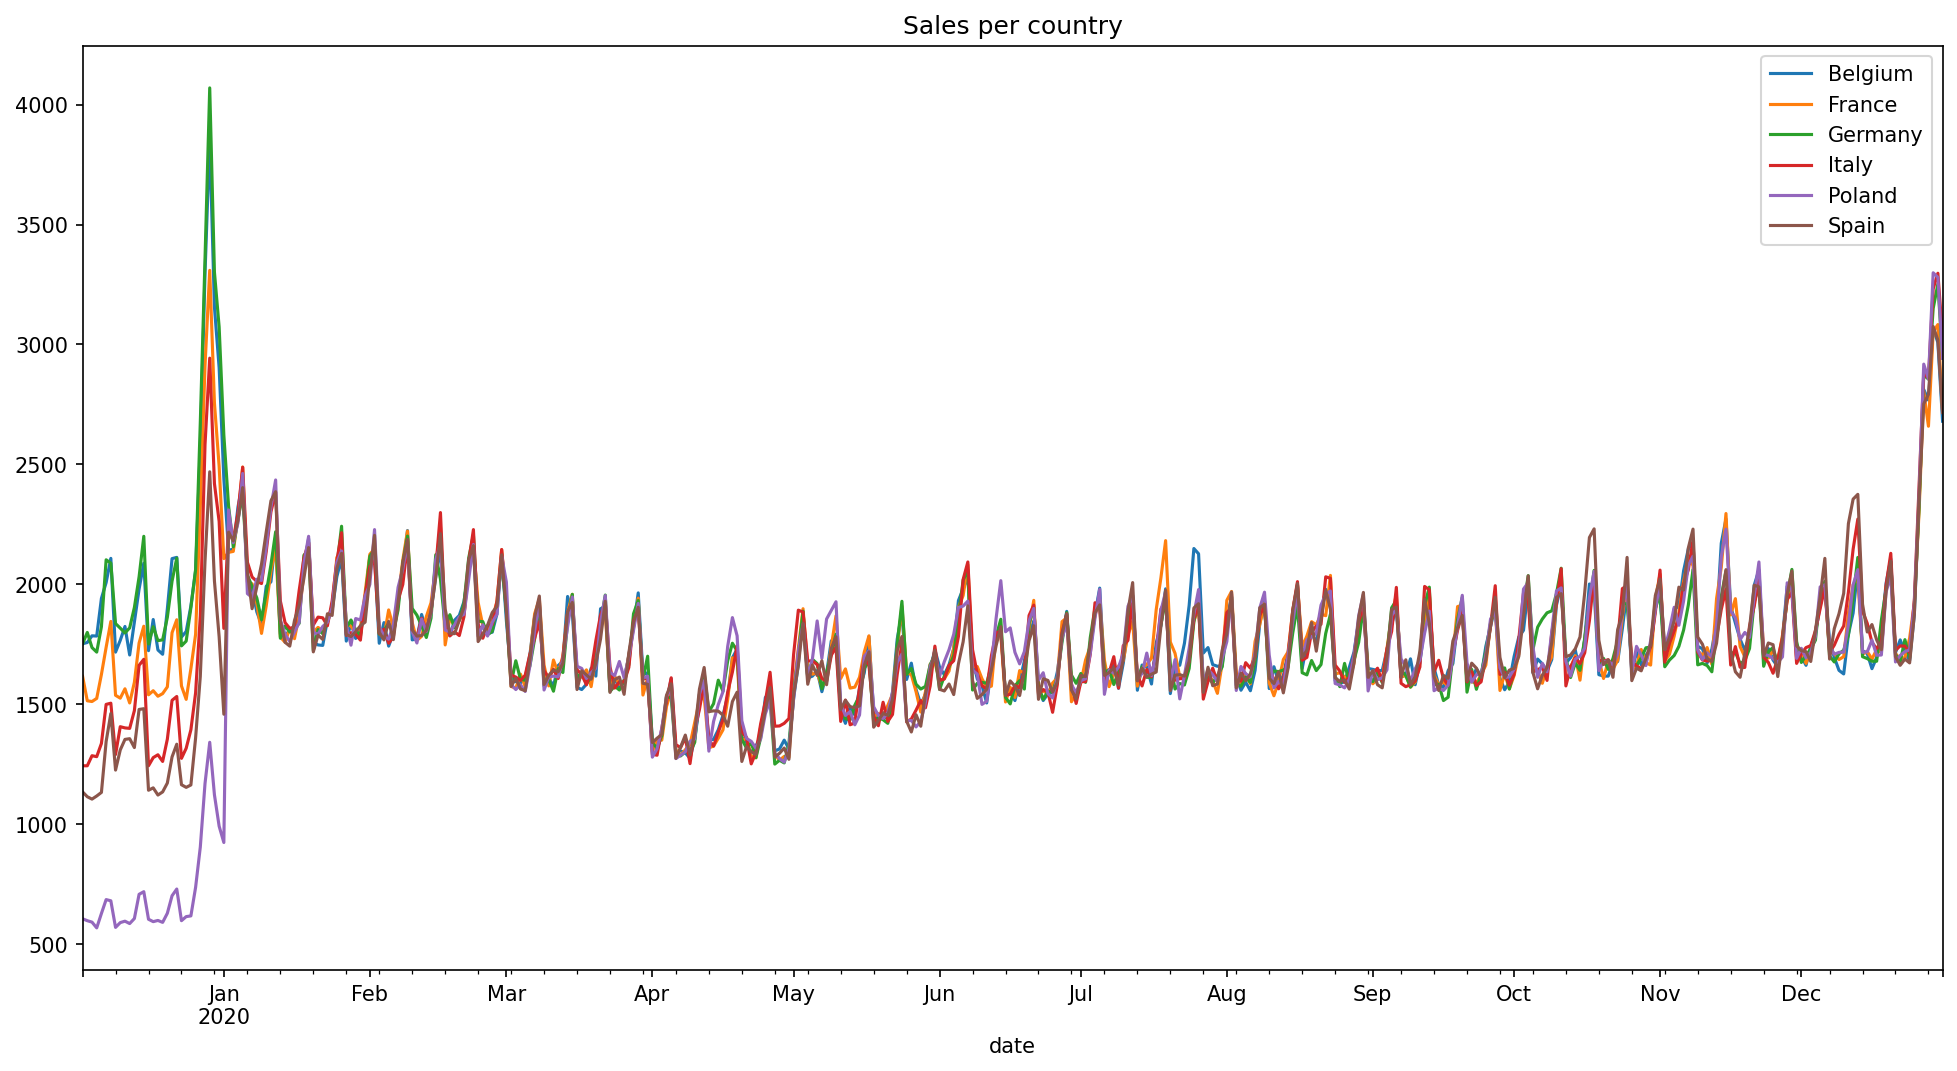

In [27]:
plot_sales_per_country(sales_per_country_2020)

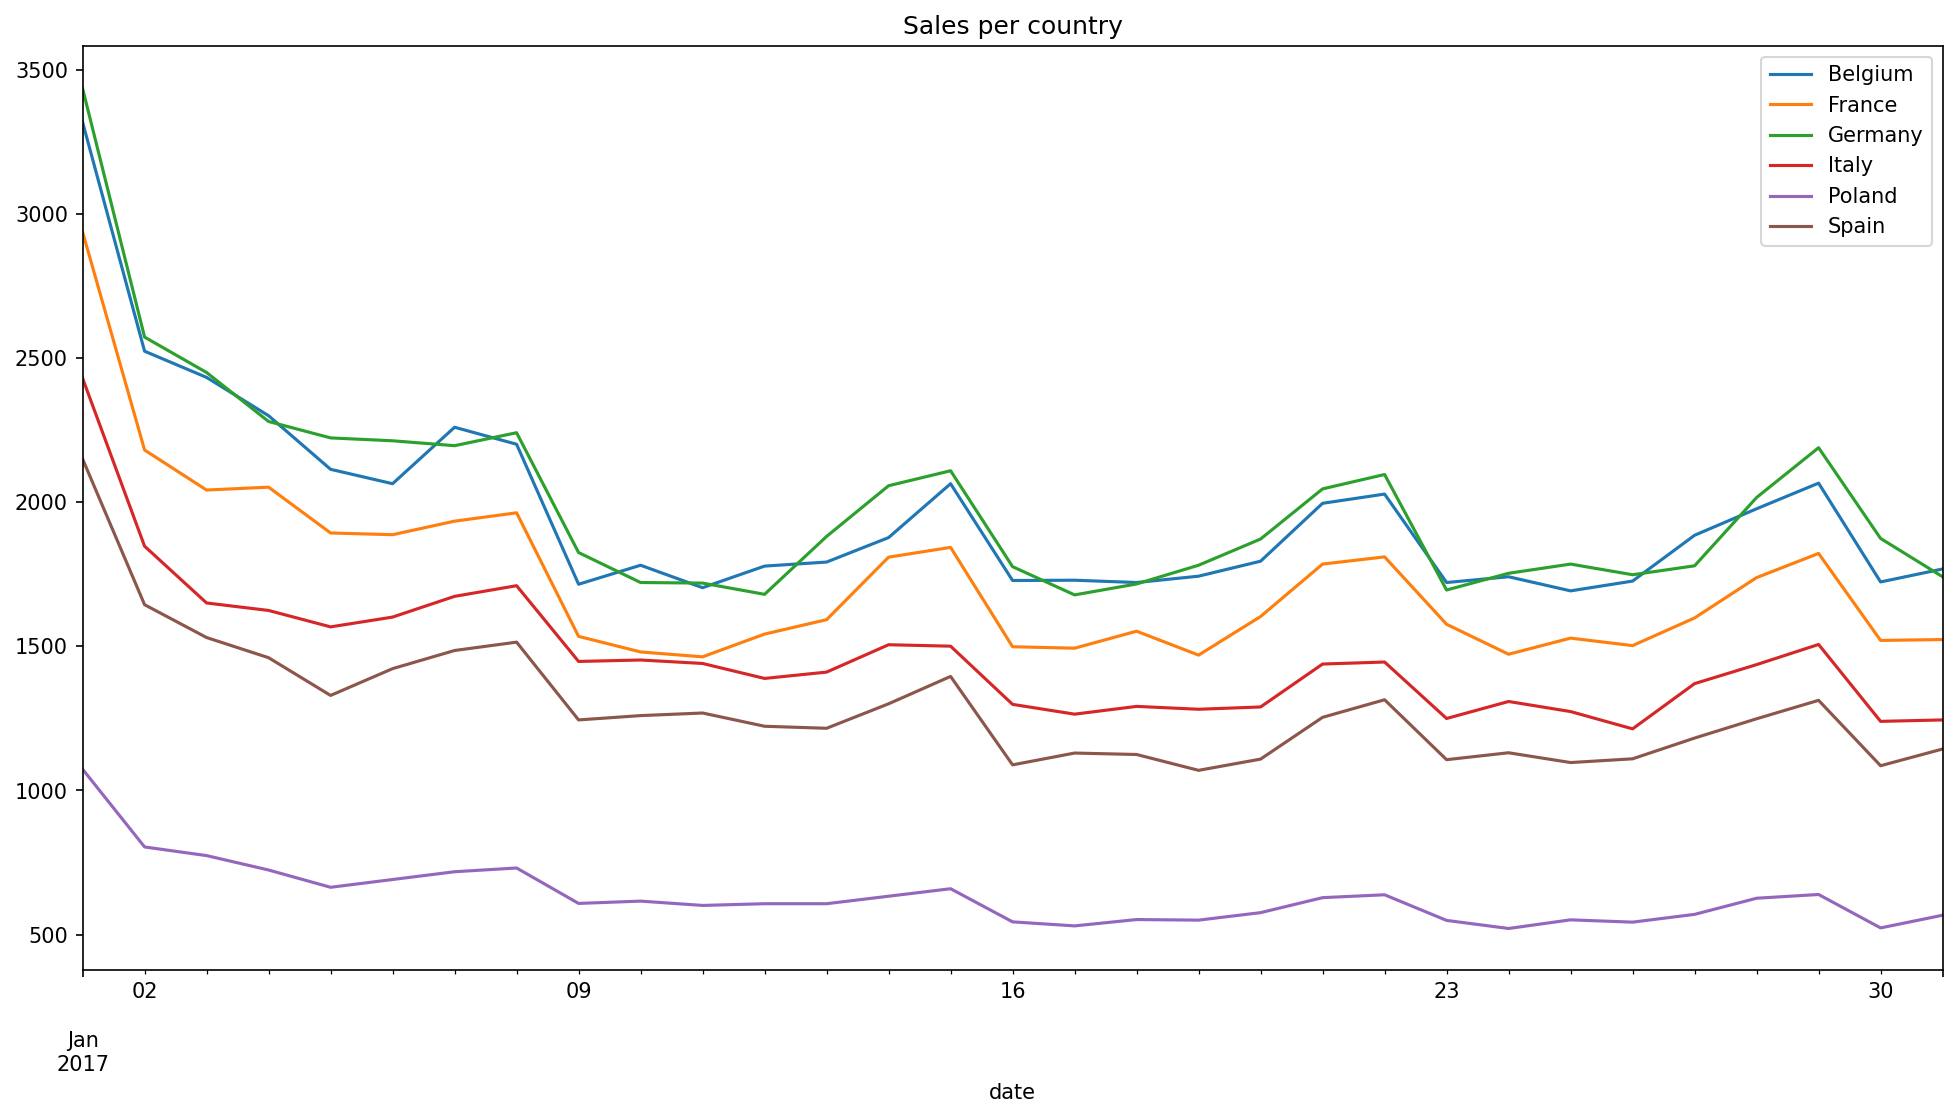

In [28]:
plot_sales_per_country(sales_per_country_2017_january)

##### Autocorrelation

In [29]:
# Autocorrelation over all years but 2020
def calculate_autocorr(df, lag = 1, use_year_2020 = True):
    if not use_year_2020:
        df = df[df['date'] < pd.Timestamp("2020-01-01")]
    for country in df['country'].unique():
        print(f"Autocorrelation for {country} is {df[df['country'] == country]['num_sold'].autocorr(lag=lag)}")

print("With lag = 28 = 4 * 7")
calculate_autocorr(sales_per_country, lag=28)
print("With lag = 30 ≠ n * 7")
calculate_autocorr(sales_per_country, lag=30)

With lag = 28 = 4 * 7
Autocorrelation for Belgium is 0.5523447036965516
Autocorrelation for France is 0.48738224192567675
Autocorrelation for Germany is 0.5244551966224321
Autocorrelation for Italy is 0.6004712242948284
Autocorrelation for Poland is 0.8981090224884413
Autocorrelation for Spain is 0.7595387366004243
With lag = 30 ≠ n * 7
Autocorrelation for Belgium is 0.16109930796206345
Autocorrelation for France is 0.0477606784965263
Autocorrelation for Germany is 0.17681282387338534
Autocorrelation for Italy is 0.32816197188323687
Autocorrelation for Poland is 0.8644708959641013
Autocorrelation for Spain is 0.5820013716483833


### b) Sales country & individual product

<b>❗ Insights</b> :
- Insides from before are confirmed again
- In the years leading up to 2020 each country has a different distribution
- From 2020 the country does not have an impact, the products to.
<b> ❓ Questions </b>:
- Leave out the country informaiton as it does not carry any information for the model

In [100]:
product_sales_per_country = train_df.groupby(['date','country', 'product']).agg({
    'num_sold': 'sum',
}).reset_index()

# Fuse the two columns country & product
product_sales_per_country["product_by_country"] = product_sales_per_country["country"] + " - " + product_sales_per_country["product"]
product_sales_per_country.drop(["country", "product"], axis=1, inplace=True)

product_sales_per_country = product_sales_per_country.set_index('date')
product_sales_per_country.head(10)

num_sold                          product_by_country
date                                                            
2017-01-01       903        Belgium - Kaggle Advanced Techniques
2017-01-01       802            Belgium - Kaggle Getting Started
2017-01-01       638                Belgium - Kaggle Recipe Book
2017-01-01       977  Belgium - Kaggle for Kids: One Smart Goose
2017-01-01       830         France - Kaggle Advanced Techniques
2017-01-01       635             France - Kaggle Getting Started
2017-01-01       547                 France - Kaggle Recipe Book
2017-01-01       927   France - Kaggle for Kids: One Smart Goose
2017-01-01       940        Germany - Kaggle Advanced Techniques
2017-01-01       766            Germany - Kaggle Getting Started

In [101]:
products = train_df["product"].unique()

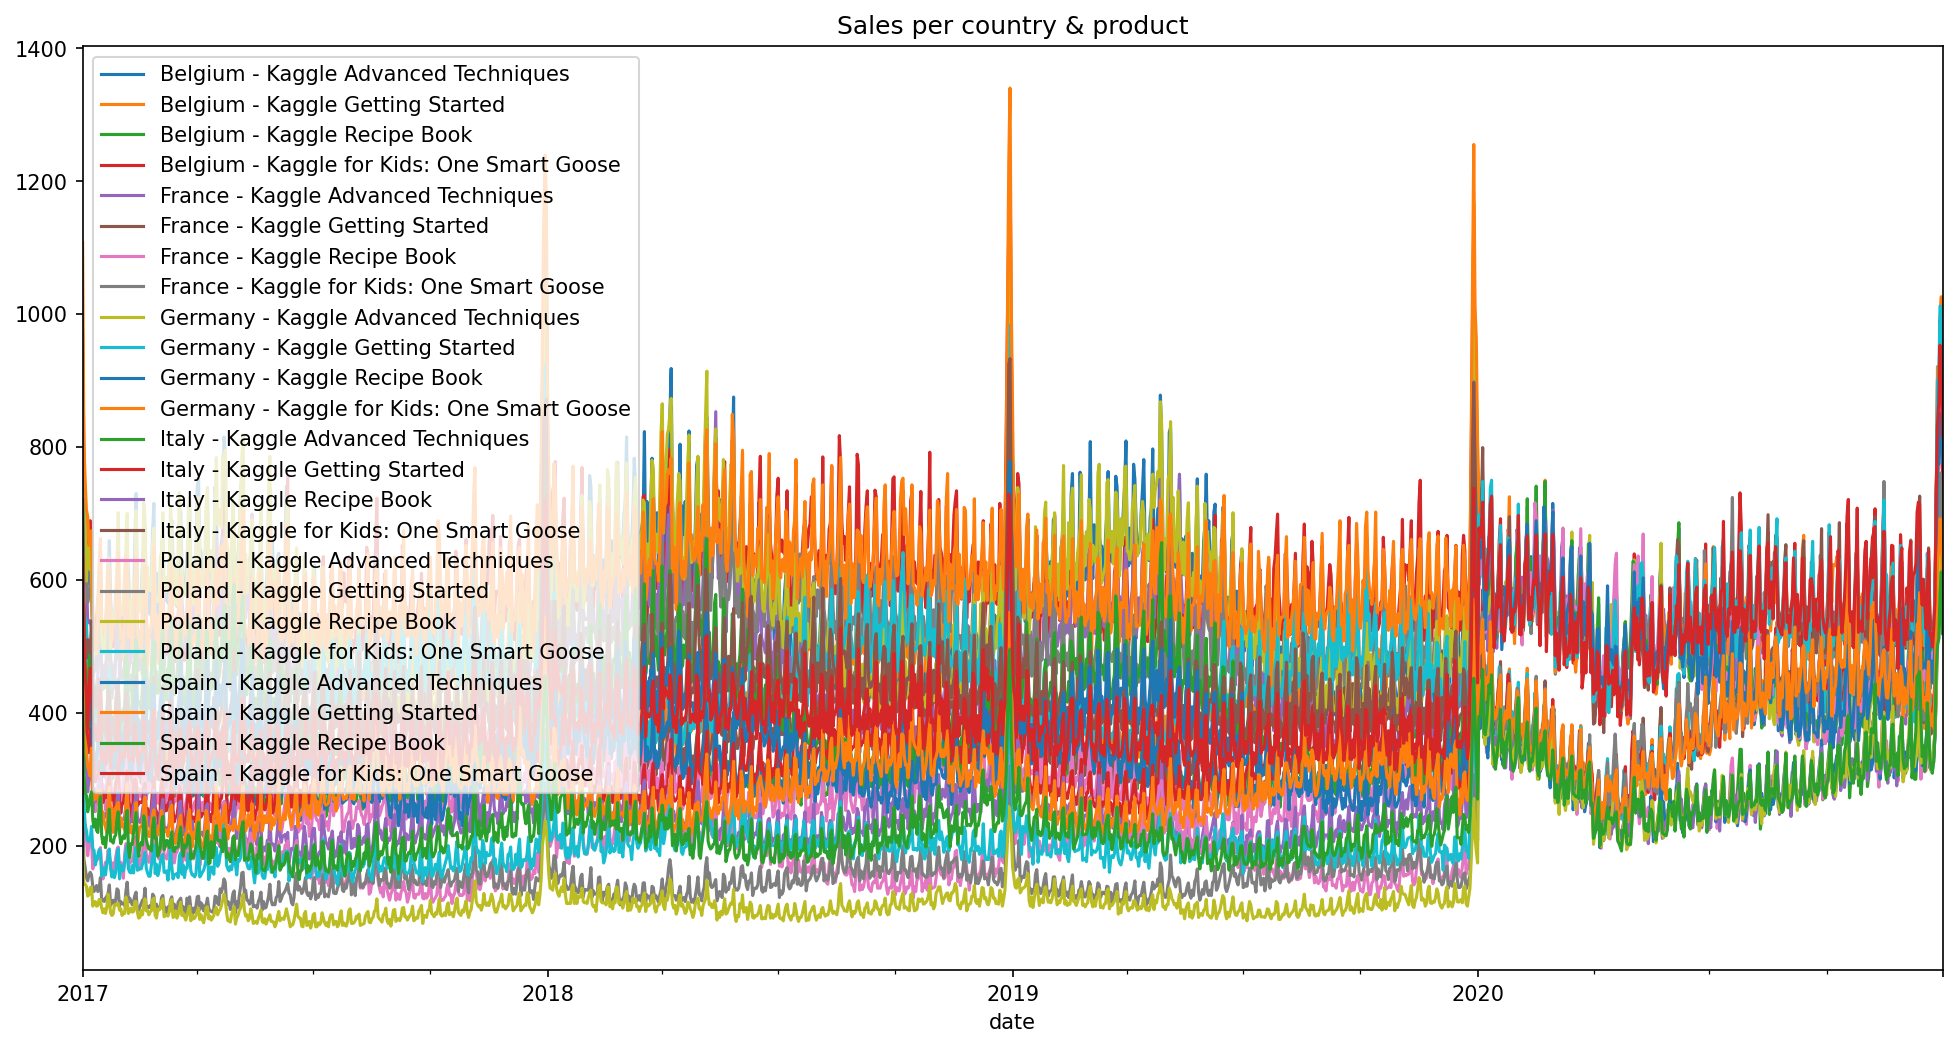

In [102]:
# All books in one plot where books have same color
plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country.product_by_country.unique():
    product_sales_per_country[product_sales_per_country['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination)
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

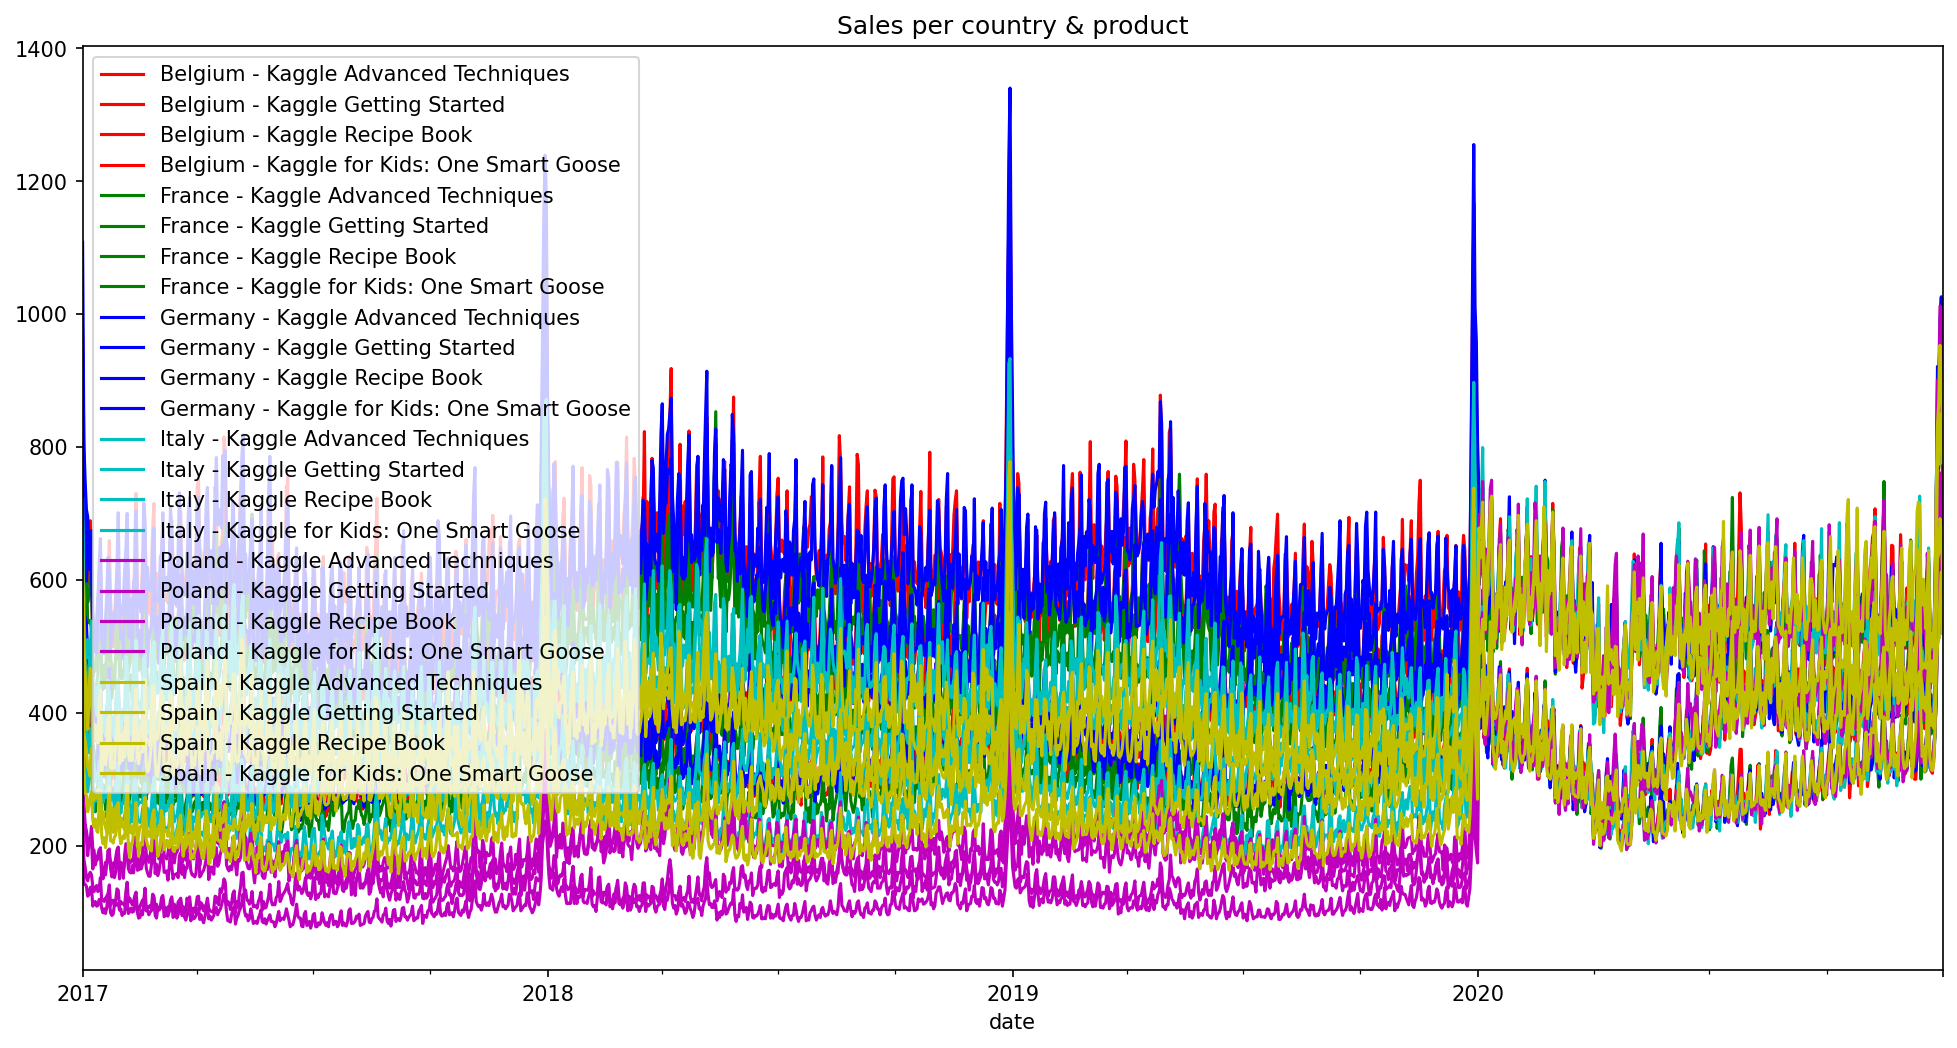

In [103]:
# Color countries the same
country_to_color = {}
countries = train_df.country.unique()
colors = ["r", "g", "b", "c", "m", "y"]
for idx, country in enumerate(countries):
    country_to_color[country] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country.product_by_country.unique():
    product_sales_per_country[product_sales_per_country['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination, c = country_to_color[product_country_combination.split(" - ")[0]])
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

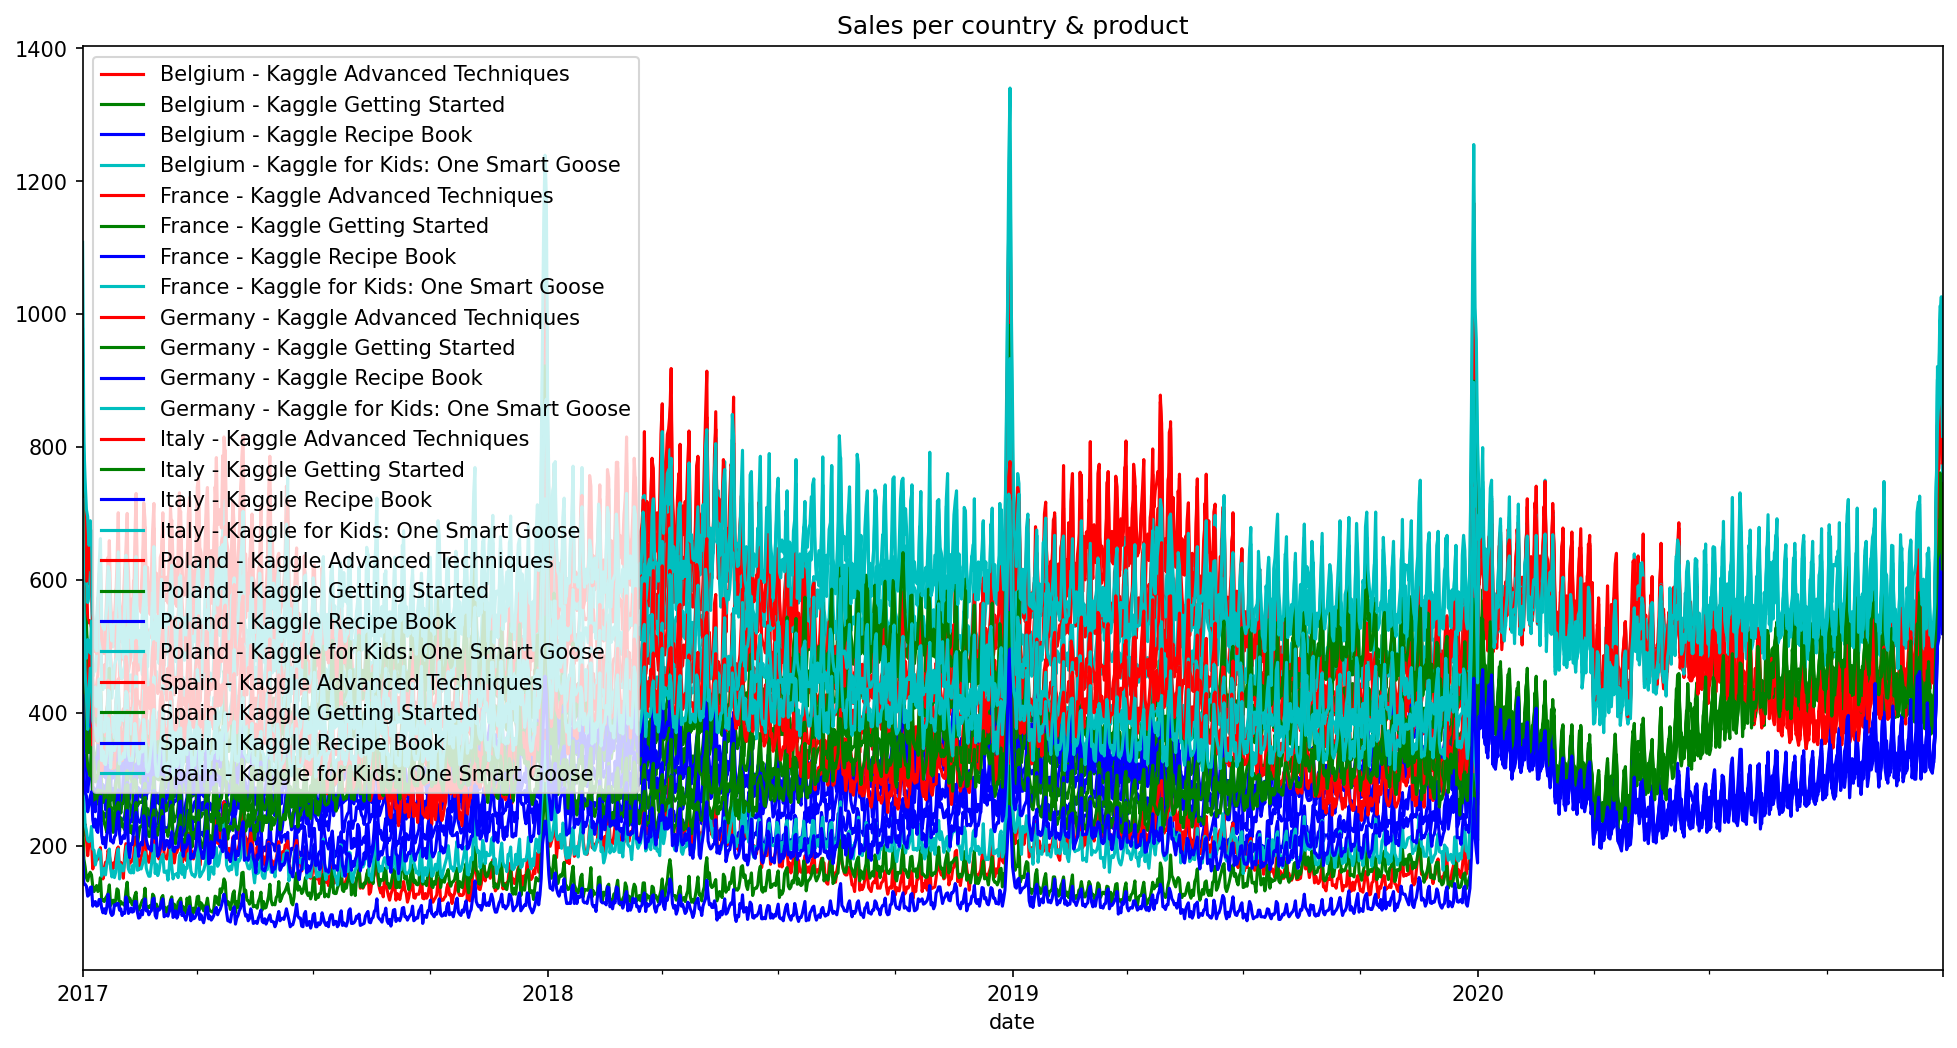

In [104]:
# Color products the same
product_to_color = {}
countries = train_df["product"].unique()
colors = ["r", "g", "b", "c", "m", "y"]
for idx, product in enumerate(countries):
    product_to_color[product] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country.product_by_country.unique():
    product_sales_per_country[product_sales_per_country['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination, c = product_to_color[product_country_combination.split(" - ")[1]])
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

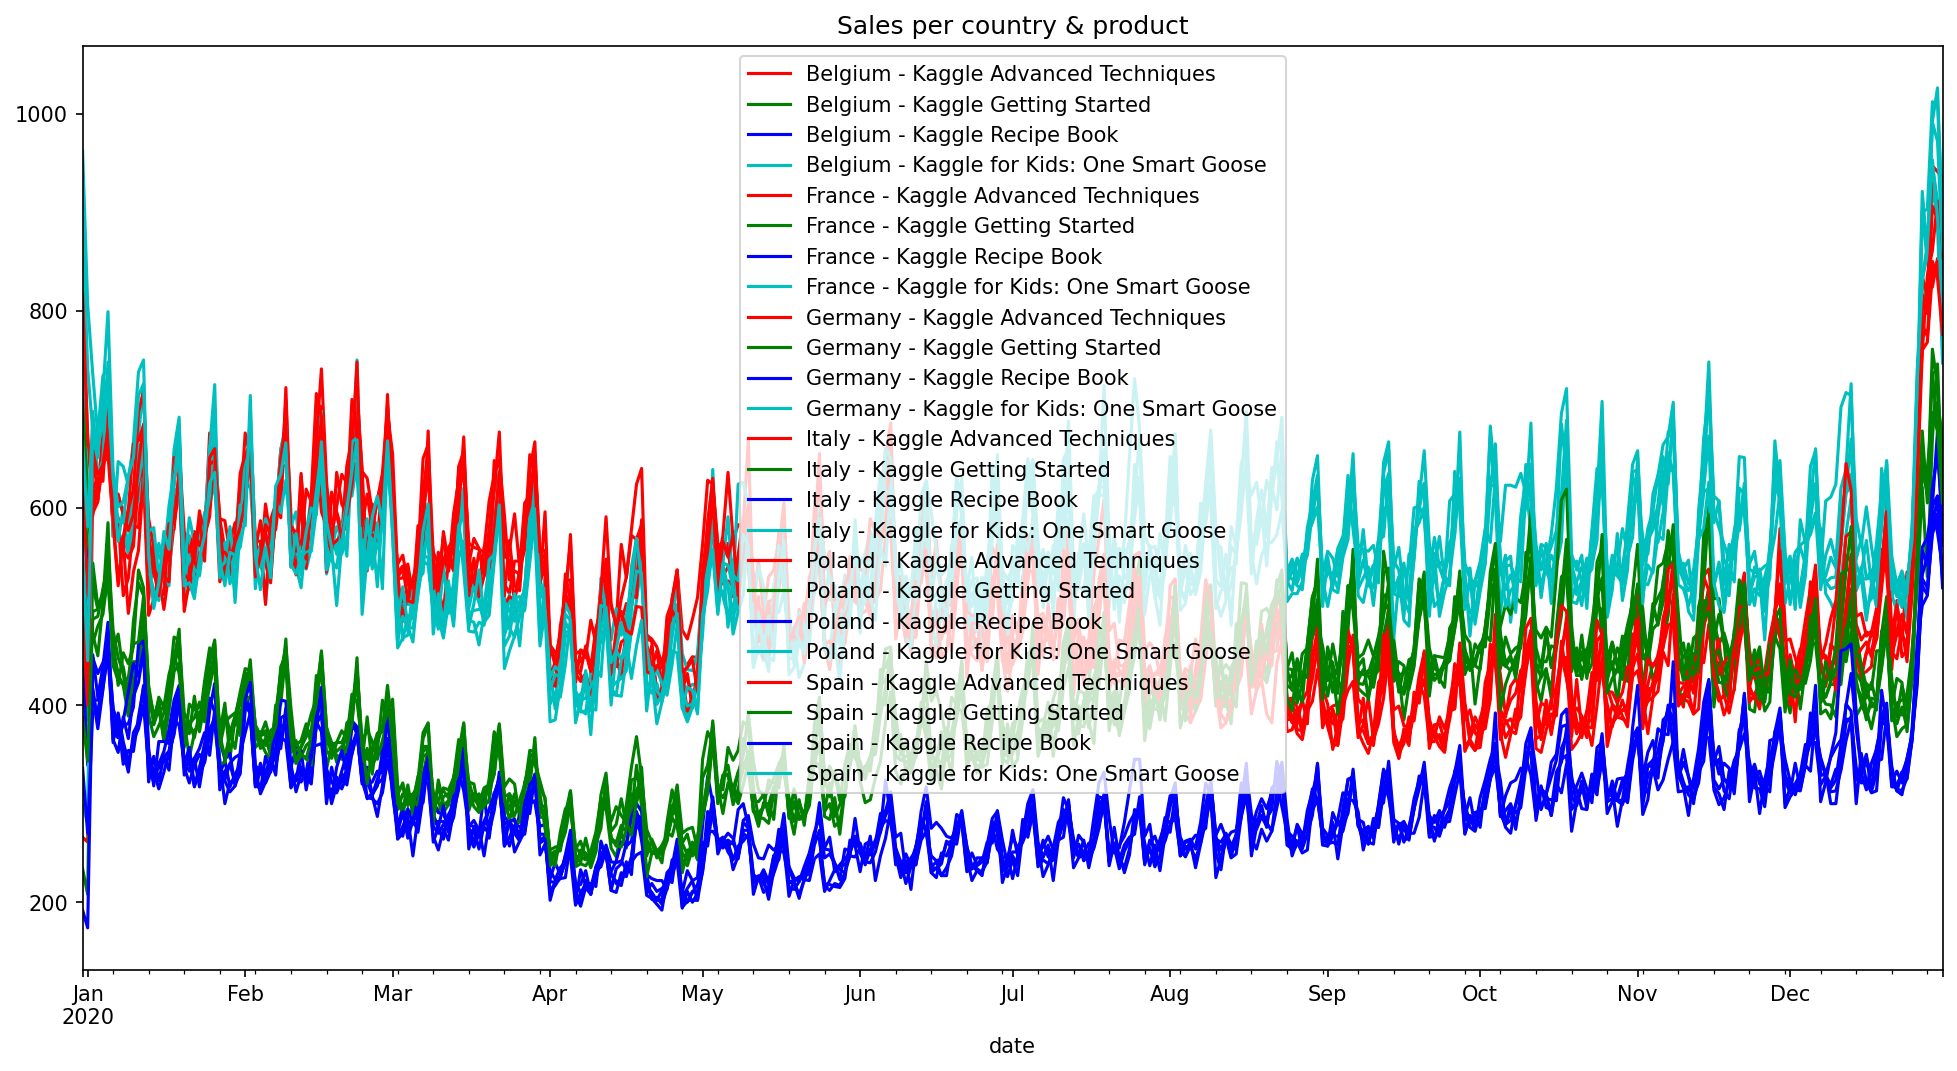

In [105]:
# Zoom in on 2020
product_sales_per_country.reset_index(inplace=True)
product_sales_per_country_2020 = product_sales_per_country[product_sales_per_country["date"] > pd.Timestamp("2019-12-30")]
product_sales_per_country_2020.set_index('date', inplace=True)

plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country_2020.product_by_country.unique():
    product_sales_per_country_2020[product_sales_per_country_2020['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination, c = product_to_color[product_country_combination.split(" - ")[1]])
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

### c) Sales per store

<b>❗ Insights</b> :
- Change in data from year 2020 onward clearly visible. This is a new trend as can be seen by the decomposition. Also, seasonal fluctuations (weekly and yearly) don't change in 2020. This is clear from the not significantly higher residual values in 2020.
- The two shops are almost perfectly correlated even in 2020. Given one book store we should be able to predict the other one by a simple multiplication and some noise.

<b> ❓ Questions </b>:
- How is the behaviour in each country? Also almost perfectly correlated?
- Is there any benefit to use the additional datapoints for the second book store as the datapoints are basically perfectly correlated across time?

In [30]:
sales_per_store = train_df.groupby(['date','store']).agg({
    'num_sold': 'sum',
}).reset_index()
sales_per_store = sales_per_store.set_index('date')
sales_per_store.head(10)

store  num_sold
date                            
2017-01-01  KaggleMart     11314
2017-01-01  KaggleRama      4038
2017-01-02  KaggleMart      8564
2017-01-02  KaggleRama      3014
2017-01-03  KaggleMart      8074
2017-01-03  KaggleRama      2810
2017-01-04  KaggleMart      7736
2017-01-04  KaggleRama      2709
2017-01-05  KaggleMart      7244
2017-01-05  KaggleRama      2551

In [31]:
def plot_sales_per_store(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['store'] == 'KaggleMart']['num_sold'].plot(label='KaggleMart')
    df[df['store'] == 'KaggleRama']['num_sold'].plot(label='KaggleRama')
    plt.legend()
    plt.title("Sales per store")
    plt.xlabel("date")
    plt.show()

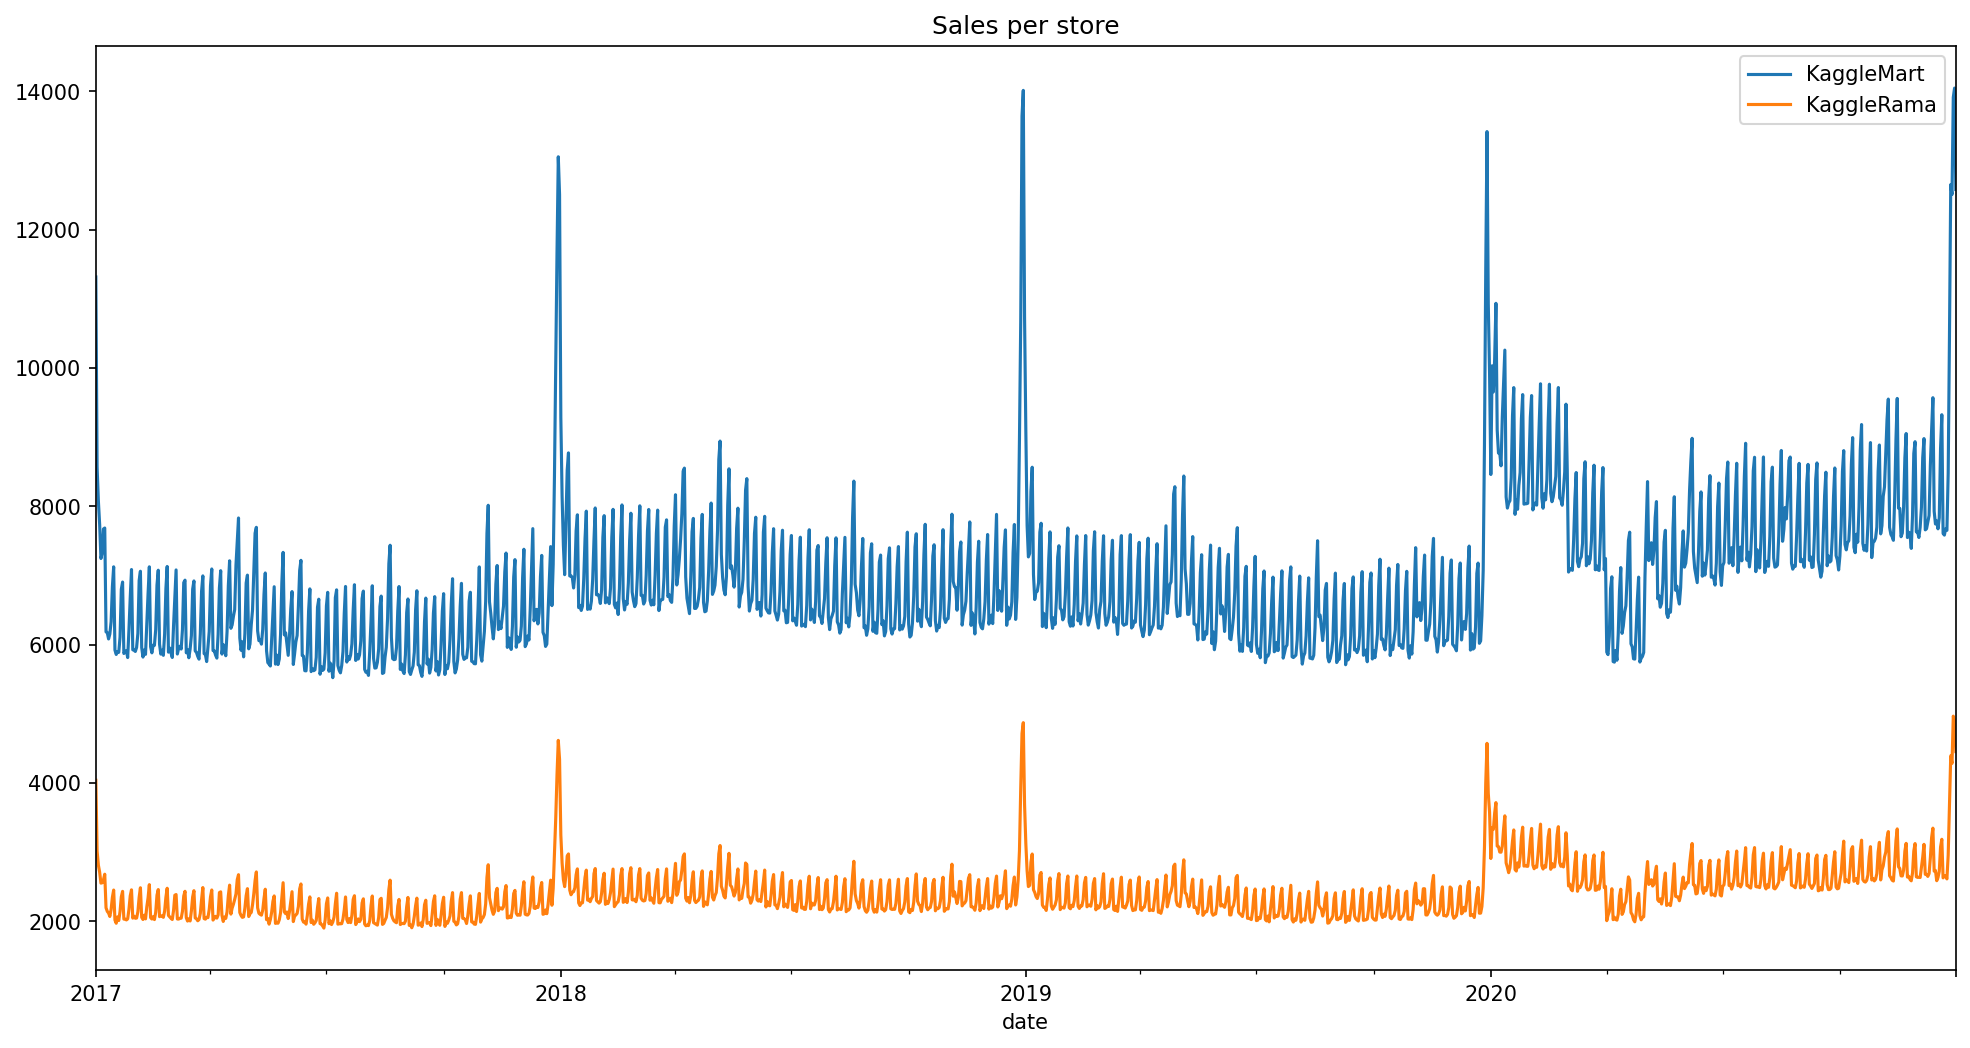

In [32]:
plot_sales_per_store(sales_per_store)

##### Correlation between time series

In [33]:
sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'].corr(sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold'])

0.9950379749563211

In [34]:
mean_div_coeff = (sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']).mean()
std_div_coeff = (sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']).std()
print(f"Mean division coeff = {mean_div_coeff} and std = {std_div_coeff} across time.")

Mean division coeff = 2.8842788732867124 and std = 0.04374457001822051 across time.


Text(0.5, 1.0, 'Deviation from mean division coefficient over 4 years')

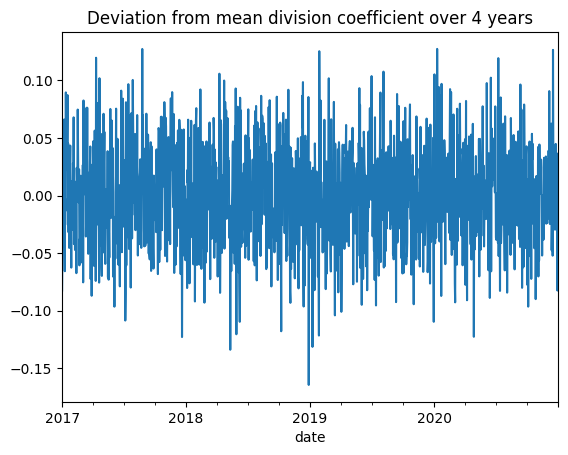

In [35]:
dev_plot = ((sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']) - mean_div_coeff).plot()
dev_plot.set_title("Deviation from mean division coefficient over 4 years")

##### Decomposition of sales for one of the two highly correlated book stores.

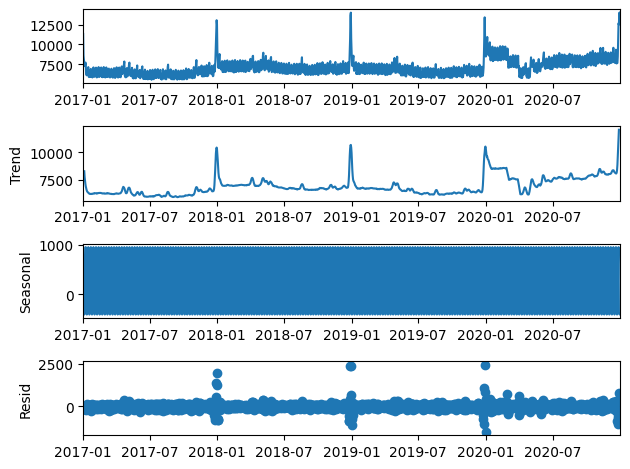

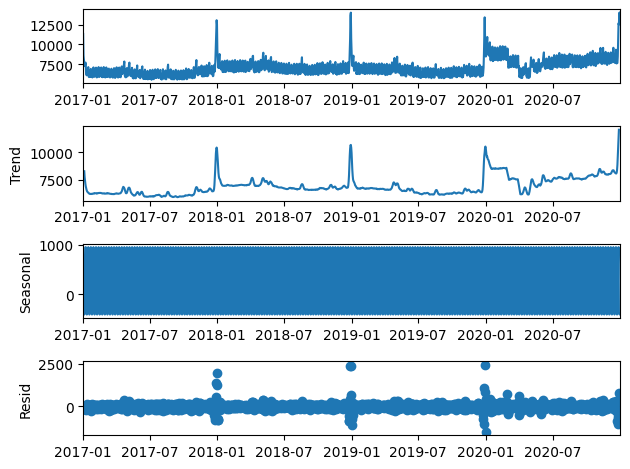

In [36]:
seasonal_decompose(sales_per_store[sales_per_store["store"] == 'KaggleMart'].drop(["store"], axis=1), model="additive").plot()

### d) Indvidual book sales per store

<b>❗ Insights</b> :
- Information about the store does not seem to hold any additional value as it is almost perfectly correlated. Only difference is noise which cannot be predicted.
- This dependency also holds for 2020
<b> ❓ Questions </b>:
- Is this still true if we don't sum over all countries? Are there differences in book store popularity between the countries?

In [69]:
product_sales_per_store = train_df.groupby(['date','store','product']).agg({
    'num_sold': 'sum',
}).reset_index()
product_sales_per_store = product_sales_per_store.set_index('date')
# Fuse the two columns
product_sales_per_store["product_by_store"] = product_sales_per_store["store"] + " - " + product_sales_per_store["product"]
product_sales_per_store.drop(["store", "product"], axis=1, inplace=True)
product_sales_per_store.head(10)

num_sold                               product_by_store
date                                                               
2017-01-01      3139        KaggleMart - Kaggle Advanced Techniques
2017-01-01      2594            KaggleMart - Kaggle Getting Started
2017-01-01      2152                KaggleMart - Kaggle Recipe Book
2017-01-01      3429  KaggleMart - Kaggle for Kids: One Smart Goose
2017-01-01      1128        KaggleRama - Kaggle Advanced Techniques
2017-01-01       898            KaggleRama - Kaggle Getting Started
2017-01-01       748                KaggleRama - Kaggle Recipe Book
2017-01-01      1264  KaggleRama - Kaggle for Kids: One Smart Goose
2017-01-02      2397        KaggleMart - Kaggle Advanced Techniques
2017-01-02      1913            KaggleMart - Kaggle Getting Started

In [70]:
# All books in one plot where books have same color
def plot_product_sales_per_store(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['product_by_store'] == 'KaggleMart - Kaggle Advanced Techniques']['num_sold'].plot(label='KaggleMart - Kaggle Advanced Techniques', c="r")
    df[df['product_by_store'] == 'KaggleMart - Kaggle Getting Started']['num_sold'].plot(label='KaggleMart - Kaggle Getting Started', c="b")
    df[df['product_by_store'] == 'KaggleMart - Kaggle Recipe Book']['num_sold'].plot(label='KaggleMart - Kaggle Recipe Book', c="g")
    df[df['product_by_store'] == 'KaggleMart - Kaggle for Kids: One Smart Goose']['num_sold'].plot(label='KaggleMart - Kaggle for Kids: One Smart Goose', c="orange")
    df[df['product_by_store'] == 'KaggleRama - Kaggle Advanced Techniques']['num_sold'].plot(label='KaggleRama - Kaggle Advanced Techniques', c="r")
    df[df['product_by_store'] == 'KaggleRama - Kaggle Getting Started']['num_sold'].plot(label='KaggleRama - Kaggle Getting Started', c="b")
    df[df['product_by_store'] == 'KaggleRama - Kaggle Recipe Book']['num_sold'].plot(label='KaggleRama - Kaggle Recipe Book', c="g")
    df[df['product_by_store'] == 'KaggleRama - Kaggle for Kids: One Smart Goose']['num_sold'].plot(label='KaggleRama - Kaggle for Kids: One Smart Goose', c="orange")

    plt.legend()
    plt.title("Sales per store & books")
    plt.xlabel("date")
    plt.show()

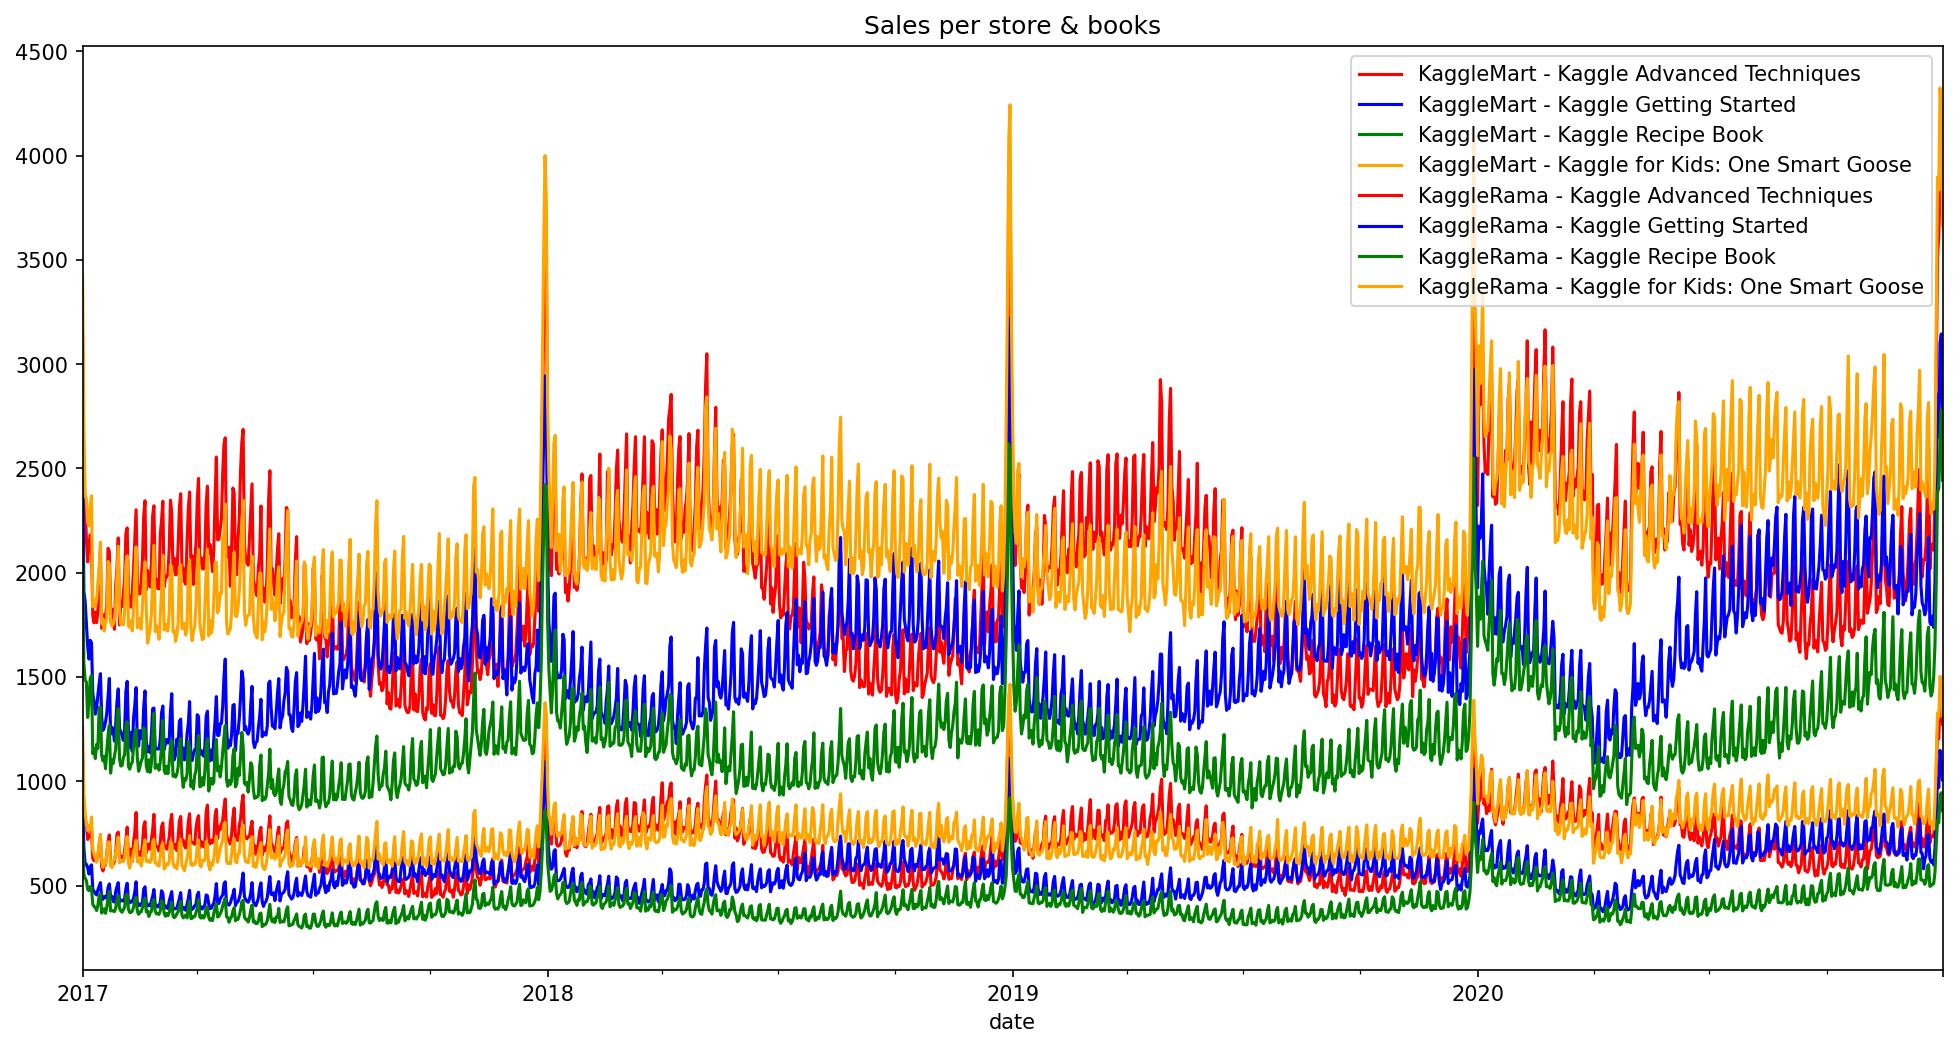

In [71]:
plot_product_sales_per_store(product_sales_per_store)

### Correlation between the individual books of the two shops

In [72]:
def calc_corr_and_const_factor(df):
    mart_book1 = df[df['product_by_store'] == 'KaggleMart - Kaggle Advanced Techniques']['num_sold']
    mart_book2 = df[df['product_by_store'] == 'KaggleMart - Kaggle Getting Started']['num_sold']
    mart_book3 = df[df['product_by_store'] == 'KaggleMart - Kaggle Recipe Book']['num_sold']
    mart_book4 = df[df['product_by_store'] == 'KaggleMart - Kaggle for Kids: One Smart Goose']['num_sold']
    rama_book1 = df[df['product_by_store'] == 'KaggleRama - Kaggle Advanced Techniques']['num_sold']
    rama_book2 = df[df['product_by_store'] == 'KaggleRama - Kaggle Getting Started']['num_sold']
    rama_book3 = df[df['product_by_store'] == 'KaggleRama - Kaggle Recipe Book']['num_sold']
    rama_book4 = df[df['product_by_store'] == 'KaggleRama - Kaggle for Kids: One Smart Goose']['num_sold']
    print(f"Corr for book 1 between two stores: {mart_book1.corr(rama_book1)}")
    print(f"Corr for book 2 between two stores: {mart_book2.corr(rama_book2)}")
    print(f"Corr for book 3 between two stores: {mart_book3.corr(rama_book3)}")
    print(f"Corr for book 4 between two stores: {mart_book4.corr(rama_book4)}")
    print(f"Constant factor for book 1 sales between the two stores: {(mart_book1 / rama_book1).mean()}")
    print(f"Constant factor for book 2 sales between the two stores: {(mart_book2 / rama_book2).mean()}")
    print(f"Constant factor for book 3 sales between the two stores: {(mart_book3 / rama_book3).mean()}")
    print(f"Constant factor for book 4 sales between the two stores: {(mart_book4 / rama_book4).mean()}")


In [73]:
calc_corr_and_const_factor(product_sales_per_store)

Corr for book 1 between two stores: 0.9885864553172288
Corr for book 2 between two stores: 0.9868288174282333
Corr for book 3 between two stores: 0.9867445114437208
Corr for book 4 between two stores: 0.9831478812041189
Constant factor for book 1 sales between the two stores: 2.8844457681381934
Constant factor for book 2 sales between the two stores: 2.885420860653922
Constant factor for book 3 sales between the two stores: 2.8896234586877023
Constant factor for book 4 sales between the two stores: 2.8841666385098543


### What about the time after 2020?

In [74]:
product_sales_per_store.reset_index(inplace=True)
product_sales_per_store_2020 = product_sales_per_store[product_sales_per_store["date"] > pd.Timestamp("2019-12-01")]
product_sales_per_store_2020.set_index('date', inplace=True)

In [75]:
calc_corr_and_const_factor(product_sales_per_store_2020)

Corr for book 1 between two stores: 0.9860970314975912
Corr for book 2 between two stores: 0.9882790031631253
Corr for book 3 between two stores: 0.9900530292540068
Corr for book 4 between two stores: 0.9793971438942841
Constant factor for book 1 sales between the two stores: 2.888943257950262
Constant factor for book 2 sales between the two stores: 2.8854245138100376
Constant factor for book 3 sales between the two stores: 2.8866631439796806
Constant factor for book 4 sales between the two stores: 2.8822161774953186


💡 <b> Summing up so far </b>
- The data changes distribution and behaviour after the year 2020. The years leading up to 2020 aren't representative and might be confusing rather than helpful for the model
- Before 2020 every country has a different selling behavior. After 2020 these differences disappear. The products sell almost identically across all countries for that time period.
- The influence of shops does not seem to be important, only the product really matters. This can be seen by the high correlation between the same book beeing sold in different stores. There exists a constant factor between the two shops which is 2.88 for all 4 products! Therefore, by only focusing on one shop it could be possible to infer the other one.


### e) Sales per store & country


In [108]:
sales_per_country_store = train_df.groupby(['date','country', 'store']).agg({
    'num_sold': 'sum',
}).reset_index()
# Combine the two columns country & store
sales_per_country_store["country_and_store"] = sales_per_country_store["country"] + " - " + sales_per_country_store["store"]
sales_per_country_store.drop(["country", "store"], axis=1, inplace=True)
sales_per_country_store = sales_per_country_store.set_index('date')
sales_per_country_store.head(10)

num_sold     country_and_store
date                                      
2017-01-01      2468  Belgium - KaggleMart
2017-01-01       852  Belgium - KaggleRama
2017-01-01      2152   France - KaggleMart
2017-01-01       787   France - KaggleRama
2017-01-01      2548  Germany - KaggleMart
2017-01-01       889  Germany - KaggleRama
2017-01-01      1781    Italy - KaggleMart
2017-01-01       650    Italy - KaggleRama
2017-01-01       790   Poland - KaggleMart
2017-01-01       284   Poland - KaggleRama

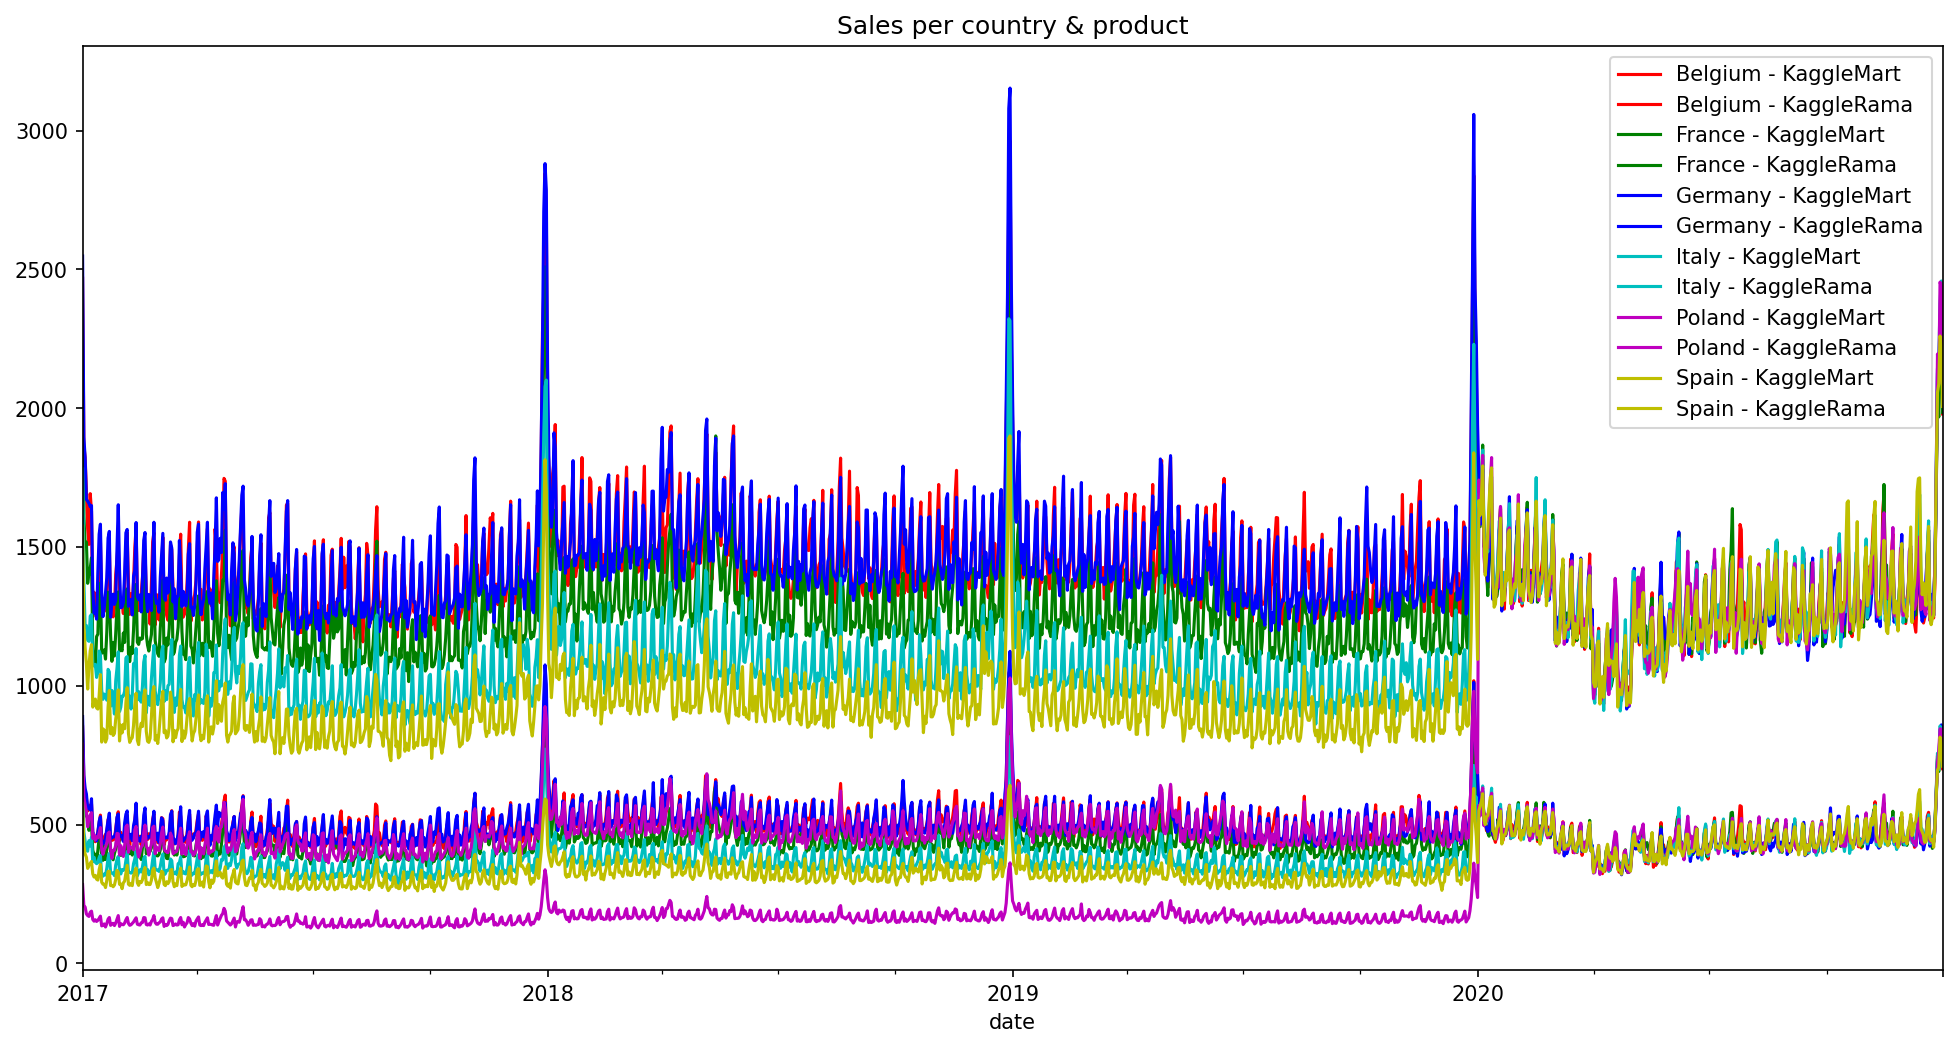

In [109]:
# Color countries the same
country_to_color = {}
countries = train_df["country"].unique()
colors = ["r", "g", "b", "c", "m", "y"]
for idx, country in enumerate(countries):
    country_to_color[country] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for country_store_combination in sales_per_country_store.country_and_store.unique():
    sales_per_country_store[sales_per_country_store['country_and_store'] == country_store_combination]['num_sold'].plot(label=country_store_combination, c = country_to_color[country_store_combination.split(" - ")[0]])
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

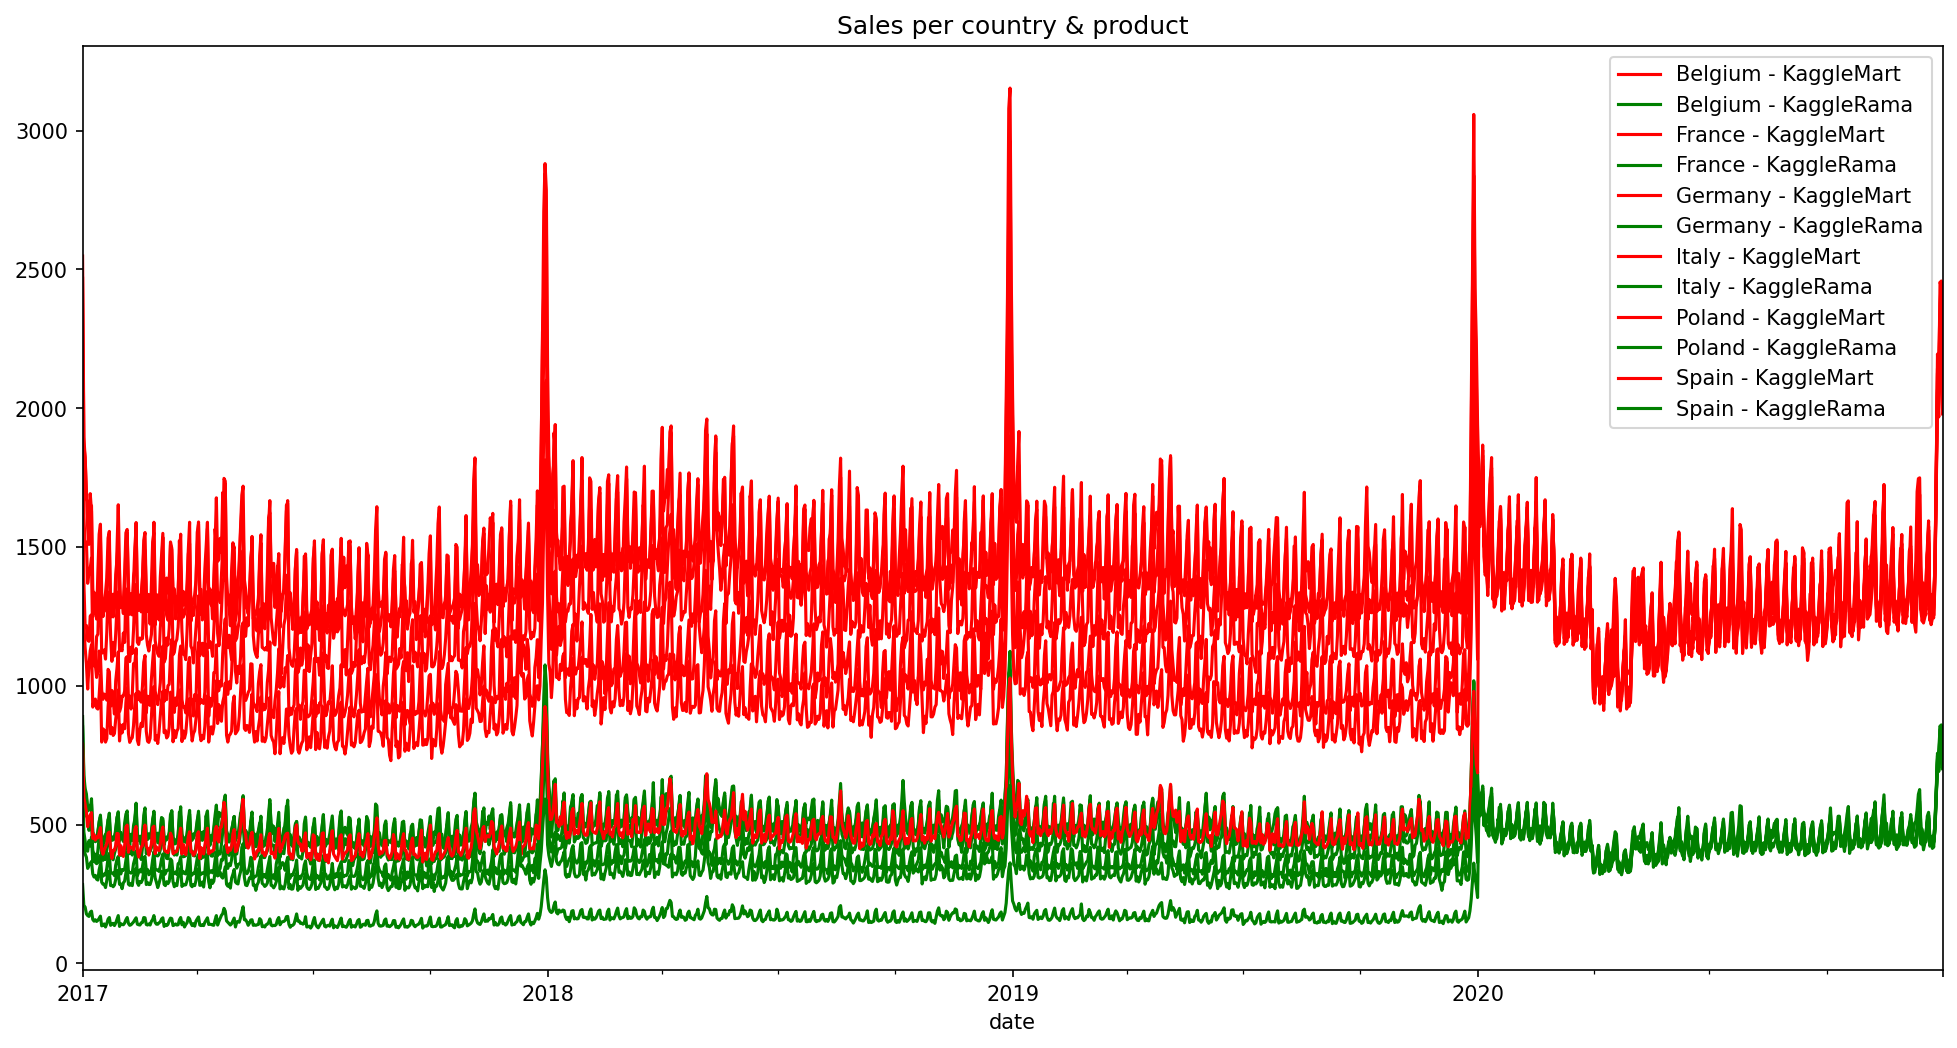

In [110]:
# Color store the same
store_to_color = {}
countries = train_df["store"].unique()
colors = ["r", "g"]
for idx, store in enumerate(countries):
    store_to_color[store] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for country_store_combination in sales_per_country_store.country_and_store.unique():
    sales_per_country_store[sales_per_country_store['country_and_store'] == country_store_combination]['num_sold'].plot(label=country_store_combination, c = store_to_color[country_store_combination.split(" - ")[1]])

plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

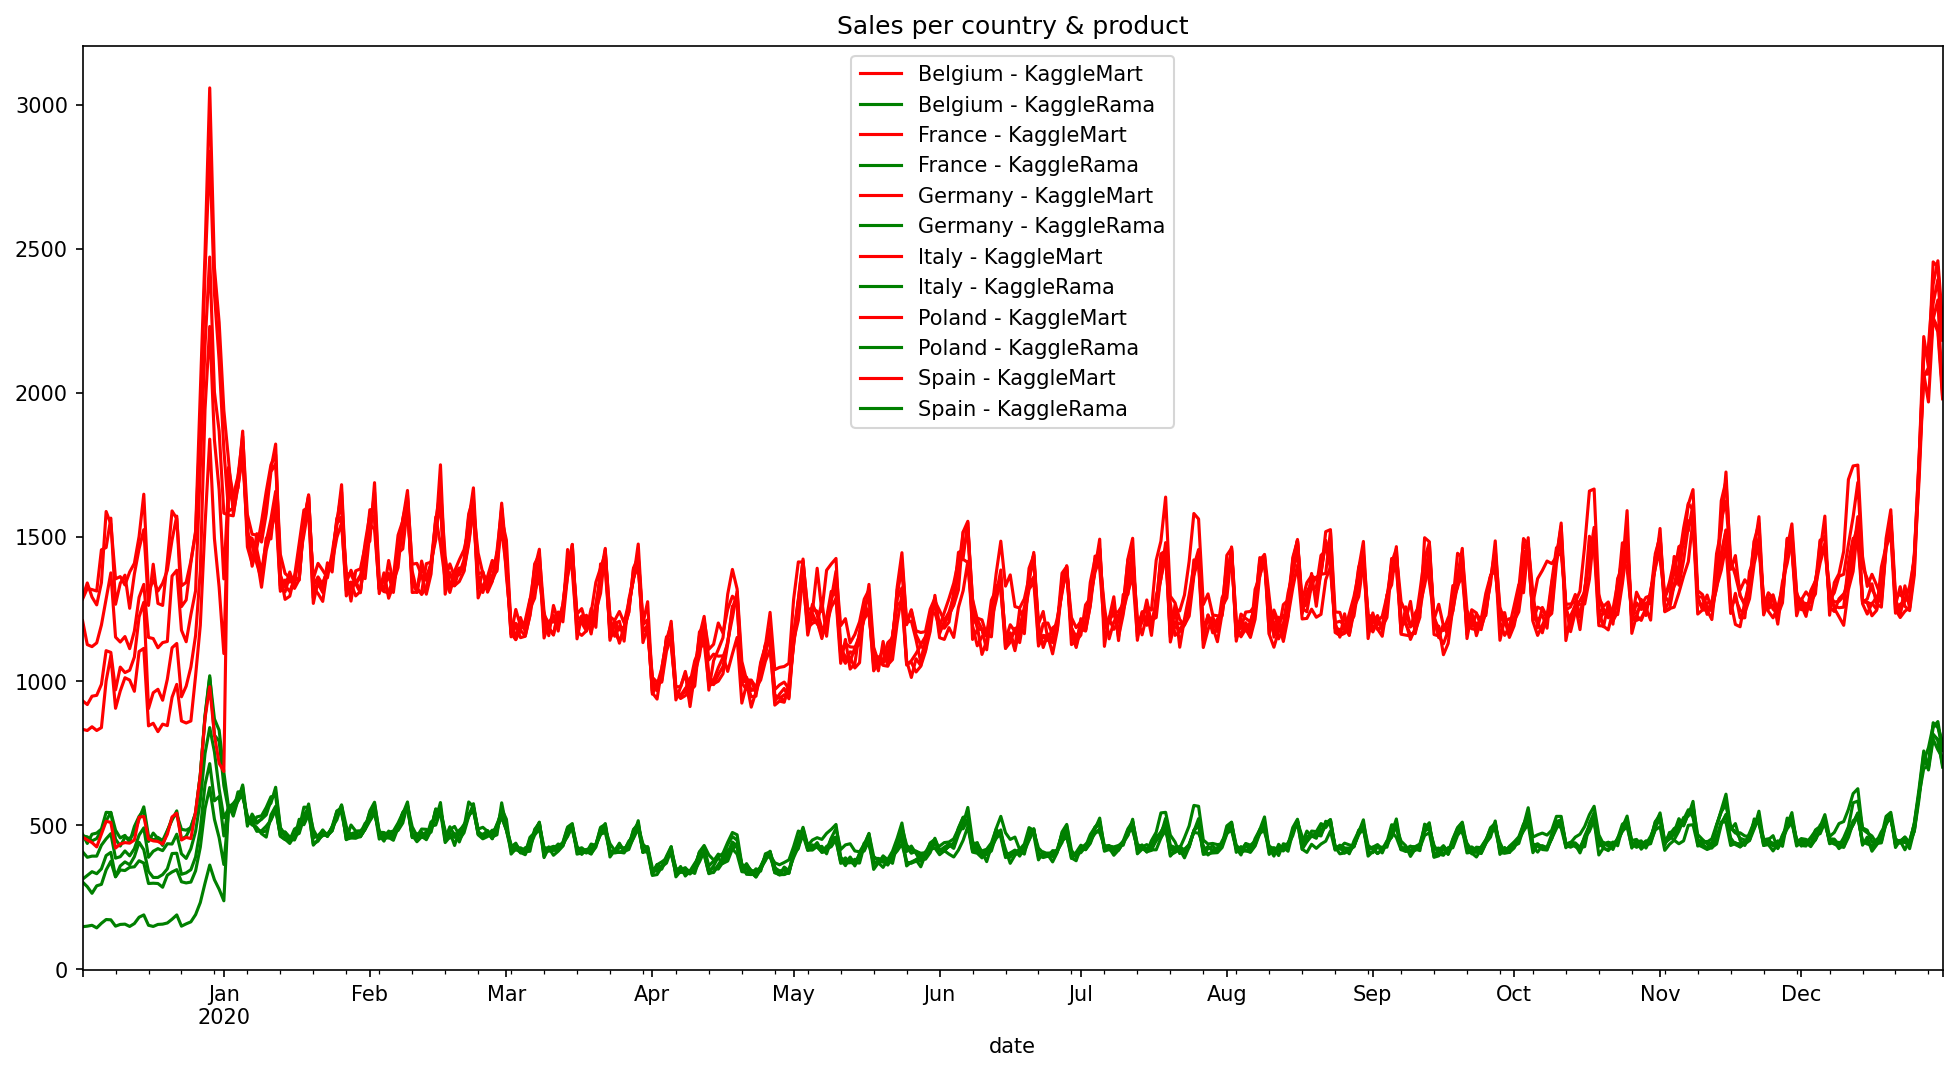

In [111]:
### Zoom in on 2020
# Color store the same
sales_per_country_store.reset_index(inplace=True)
sales_per_country_store_2020 = sales_per_country_store[sales_per_country_store["date"] > pd.Timestamp("2019-12-01")]
sales_per_country_store_2020.set_index('date', inplace=True)

plt.figure(figsize=(16, 8), dpi=150)
for country_store_combination in sales_per_country_store_2020.country_and_store.unique():
    sales_per_country_store_2020[sales_per_country_store_2020['country_and_store'] == country_store_combination]['num_sold'].plot(label=country_store_combination, c = store_to_color[country_store_combination.split(" - ")[1]])

plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()